# html

In [32]:
install.packages('rvest')
install.packages('magrittr')


  There is a binary version available but the source version is later:
      binary source needs_compilation
rvest  1.0.0  1.0.2             FALSE



installing the source package 'rvest'




  There is a binary version available but the source version is later:
         binary source needs_compilation
magrittr  2.0.1  2.0.3              TRUE

  Binaries will be installed


Warning message:
"package 'magrittr' is in use and will not be installed"

In [33]:
require(rvest)
library('magrittr')

In [7]:
?read_html

In [8]:
html = read_html('10_data/a.html',encoding = "utf-8")
html

{html_document}
<html>
[1] <body>\r\n\t<h1>테스트1</h1>\r\n\t<h1 class="my">테스트2</h1>\r\n\t<h1 id="myh2 ...

## 태그 선택자(엘리먼트)
https://oscarotero.com/jquery/

In [ ]:
# html_node( html, 'selector') 첫번째 것
# html_nodes( html, 'selector') 첫번째 것

In [ ]:
<html>

<body>
	<h1>테스트1</h1>
	<h1 class="my">테스트2</h1>
	<h1 id="myh2">테스트3</h1>
	<h2>테스트3-1</h2>
	<div id="mydiv">
		<span class="my">테스트4</span>
		<div><span>테스트5</span></div>
	</div>
	<ul class="fruit">
		<li>사과</li>
		<li>딸기</li>
		<li>포도</li>
	</ul>
	<ul class="biz">
		<li>회사1</li>
		<li>회사2</li>
		<li>회사3</li>
	</ul>
	<img src="a.jpg"><br>
	<img src="b.jpg">
</body>
</html>


In [9]:
html_nodes(html, 'h1')

{xml_nodeset (3)}
[1] <h1>테스트1</h1>
[2] <h1 class="my">테스트2</h1>
[3] <h1 id="myh2">테스트3</h1>

In [12]:
html_nodes(html, 'h1,h2') # ,는 or 의미

{xml_nodeset (4)}
[1] <h1>테스트1</h1>
[2] <h1 class="my">테스트2</h1>
[3] <h1 id="myh2">테스트3</h1>
[4] <h2>테스트3-1</h2>

In [13]:
for( h in html_nodes(html, 'h1,h2'))
    {
        cat(html_text(h), fill = T)
}

테스트1
테스트2
테스트3
테스트3-1


### id선택자(#) : 아이디 속성의 값

In [15]:
html_nodes(html, '#myh2')

{xml_nodeset (1)}
[1] <h1 id="myh2">테스트3</h1>

### 클래스선택자(.) : 클래스 속성의 값

In [16]:
html_nodes(html, '.my')

{xml_nodeset (2)}
[1] <h1 class="my">테스트2</h1>
[2] <span class="my">테스트4</span>

In [17]:
html_nodes(html, 'h1.my')

{xml_nodeset (1)}
[1] <h1 class="my">테스트2</h1>

In [18]:
html_nodes(html, 'h1,.my')

{xml_nodeset (4)}
[1] <h1>테스트1</h1>
[2] <h1 class="my">테스트2</h1>
[3] <h1 id="myh2">테스트3</h1>
[4] <span class="my">테스트4</span>

### 속성선택자([속성명])

In [19]:
html_nodes(html, '[src]')

{xml_nodeset (2)}
[1] <img src="a.jpg">
[2] <img src="b.jpg">

In [21]:
for (n in html_nodes(html, '[src]'))
{
    print( html_attr(n,'src') )
}

[1] "a.jpg"
[1] "b.jpg"


In [23]:
html_nodes(html, '[src="a.jpg"]')

{xml_nodeset (1)}
[1] <img src="a.jpg">

In [24]:
html_nodes(html, '[src*="jpg"]')

{xml_nodeset (2)}
[1] <img src="a.jpg">
[2] <img src="b.jpg">

### 자식선택자(>)

In [26]:
html_nodes(html, '#mydiv > span')

{xml_nodeset (1)}
[1] <span class="my">테스트4</span>

In [29]:
html_nodes(html, '.fruit > li')

{xml_nodeset (3)}
[1] <li>사과</li>
[2] <li>딸기</li>
[3] <li>포도</li>

### 후손선택자( 공백)

In [27]:
html_nodes(html, '#mydiv span')

{xml_nodeset (2)}
[1] <span class="my">테스트4</span>
[2] <span>테스트5</span>

### 형제선택자

In [30]:
html_nodes(html, '.fruit + ul') # 오른쪽 형제 첫번째 것

{xml_nodeset (1)}
[1] <ul class="biz">\n<li>회사1</li>\r\n\t\t<li>회사2</li>\r\n\t\t<li>회사3</li>\r\ ...

In [31]:
html_nodes(html, '.fruit ~ ul') # 오른쪽 형제 전부 다 

{xml_nodeset (1)}
[1] <ul class="biz">\n<li>회사1</li>\r\n\t\t<li>회사2</li>\r\n\t\t<li>회사3</li>\r\ ...

### 수도선택자(':정의된 이름')

In [33]:
html_nodes(html,'li:first-child')

{xml_nodeset (2)}
[1] <li>사과</li>
[2] <li>회사1</li>

In [34]:
html_nodes(html,'li:last-child')

{xml_nodeset (2)}
[1] <li>포도</li>
[2] <li>회사3</li>

In [37]:
html_nodes(html, '.fruit > li:nth-child(1)')

{xml_nodeset (1)}
[1] <li>사과</li>

In [38]:
html_nodes(html, '.fruit > li:nth-child(2)')

{xml_nodeset (1)}
[1] <li>딸기</li>

In [36]:
html_nodes(html, '.fruit > li:nth-child(2n)') # 2n은 짝수 번호만 2, 4, 6, ...

{xml_nodeset (1)}
[1] <li>딸기</li>

## 맛집데이터 파싱

In [39]:
url = 'https://www.menupan.com/restaurant/bestrest/bestrest.asp?pt=rt&areacode=ss201'
html = read_html(url, encoding = "euc-kr") # 데이터 많으면 인코딩 cp949
html

{html_document}
<html xmlns="http://www.w3.org/1999/xhtml">
[1] <head>\n<title>맛집TOP1000 - 매일매일 맛있게 메뉴판닷컴</title>\n<meta http-equiv="Cont ...
[2] <body>\r\n<div class="Wrapper">\r\n\t\r\n<table width="980" border="0" al ...

In [42]:
for ( a in html_nodes(html, '.restName > a') ){
    cat(html_text(a) , fill = T)
}

훌리오(JULIO) 강남역점
서초버드나무집
갓덴스시 강남점
잇푸도(IPPUDO) 강남점
참설농탕
아카사카
화기애애
진상 서초본점
도모다찌
평가옥 반포점
잉클링(inkling)
런드리피자(LAUNDRY PIZZA)
우동명가 기리야마 본진
강남교자
빌리엔젤 강남역점
스노우볼 강남역점
아소산겐안
오징어광장 강남점
감성캠핑맥주창고
빈스플(Beansple)
악바리
한도니
투브라더스
아란치오(Arancio)
산쪼메 강남역점


In [51]:
# 순위 
for ( a in html_nodes(html, '.numTop,.rankNum') ){
    cat(html_text(a) , fill = T)
}

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [52]:
# 업종
for ( a in html_nodes(html, '.listType') ){
    cat(html_text(a) , fill = T)
}

기타/세계
한식
일식
일식
한식
일식
한식
일식
일식
한식
카페/주점
패스트푸드
일식
한식
카페/주점
카페/주점
일식
한식
카페/주점
카페/주점
카페/주점
한식
패스트푸드
양식
일식


In [53]:
# 지역
for ( a in html_nodes(html, '.listArea ') ){
    cat(html_text(a) , fill = T)
}

강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼동
서초구 서초동
서초구 서초동
강남구 역삼동
서초구 서초동
강남구 역삼동
서초구 반포동
송파구 가락동
강남구 역삼동
강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼동
강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼1동
강남구 역삼1동
강남구 역삼동


In [21]:
순위 = html_text(html_nodes(html,'.numTop,.rankNum'))
업종 = html_text(html_nodes(html,'.listType'))
지역 = html_text(html_nodes(html,'.listArea'))
df = data.frame(순위, 업종,지역)
df

ERROR: Error in html_elements(...): 객체 'html'를 찾을 수 없습니다


# ggplot2

In [57]:
install.packages('ggplot2')

also installing the dependency 'isoband'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
isoband  0.2.4  0.2.5              TRUE
ggplot2  3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'isoband' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MEDICI\AppData\Local\Temp\RtmpcBT5m0\downloaded_packages


installing the source package 'ggplot2'



In [6]:
library(ggplot2)

In [ ]:
# ggplot2 cheatsheet 검색해서 보기

In [59]:
cars

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10
10,18
10,26
10,34
11,17


In [62]:
options(repr.plot.width=6, repr.plot.height=5)

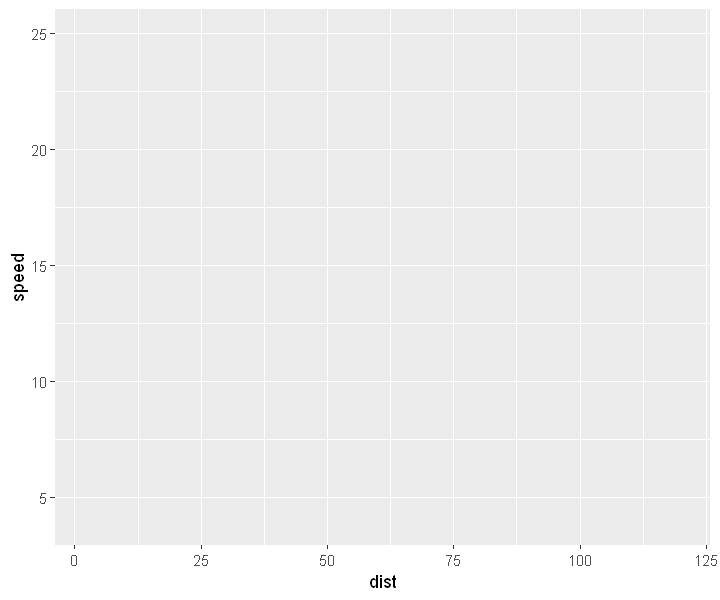

In [64]:
ggplot(cars, aes(x=dist, y=speed)) # 차트대상 영역(윈도우)

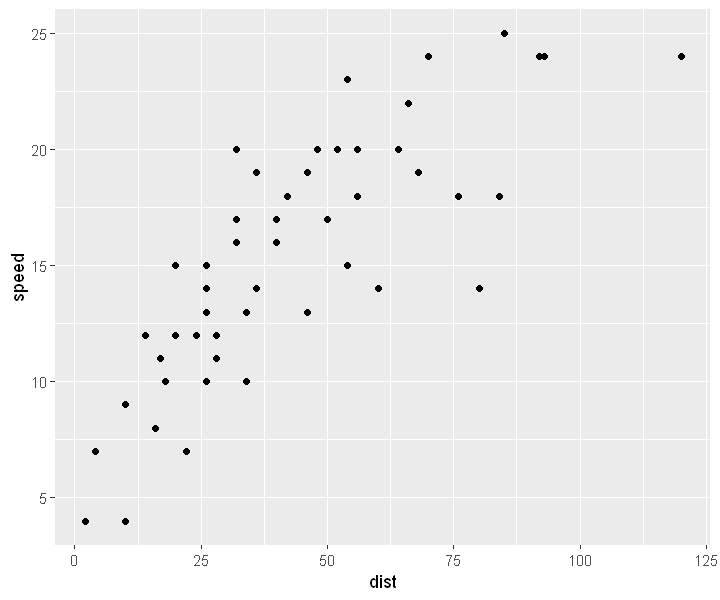

In [63]:
ggplot(cars, aes(x=dist, y=speed)) + geom_point()

In [ ]:
?geom_point

<img src='http://www.sthda.com/sthda/RDoc/images/points-symbols.png'>


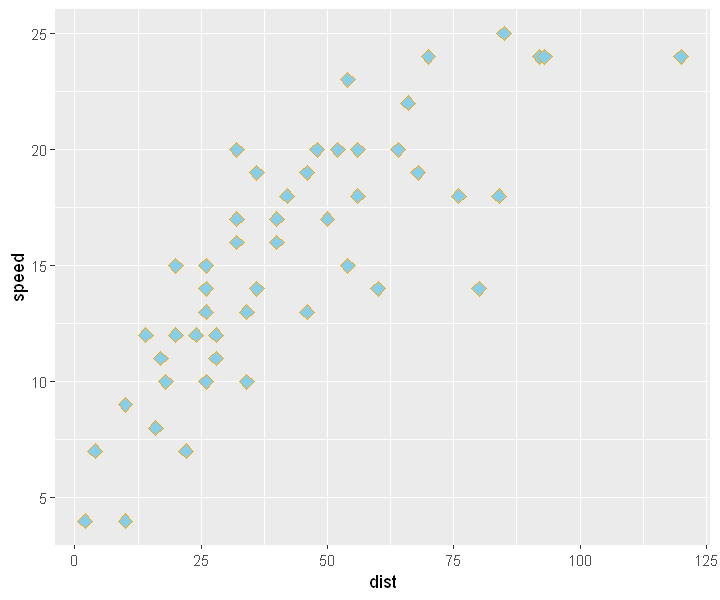

In [75]:
ggplot(cars, aes(x=dist, y=speed)) + geom_point(shape = 23, fill = 'skyblue', col = 'orange', size =3)

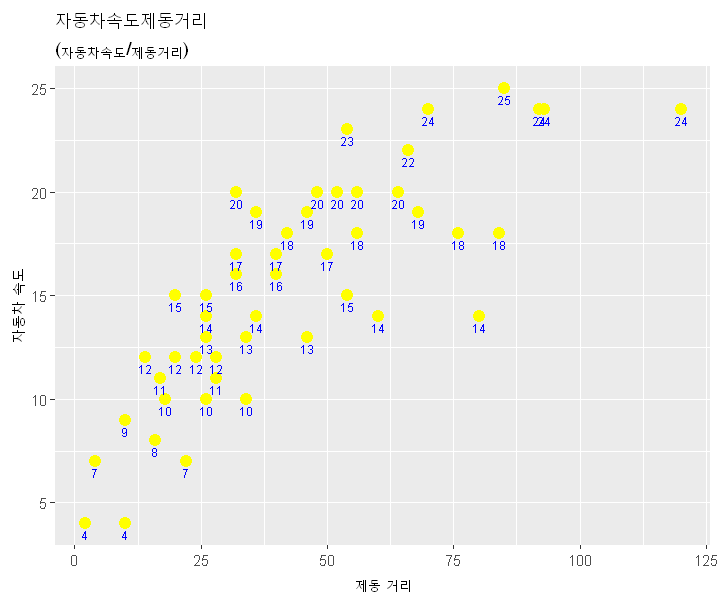

In [84]:
ggplot(cars, aes(x = dist, y = speed)) +
  geom_point(size = 3, color = "yellow") +  
  geom_text( aes(label=speed), color = 'blue', size = 2.5, vjust = 1.6) +
 labs(x='제동 거리', y='자동차 속도',title = '자동차') +
 ggtitle('자동차속도제동거리', subtitle="(자동차속도/제동거리)")

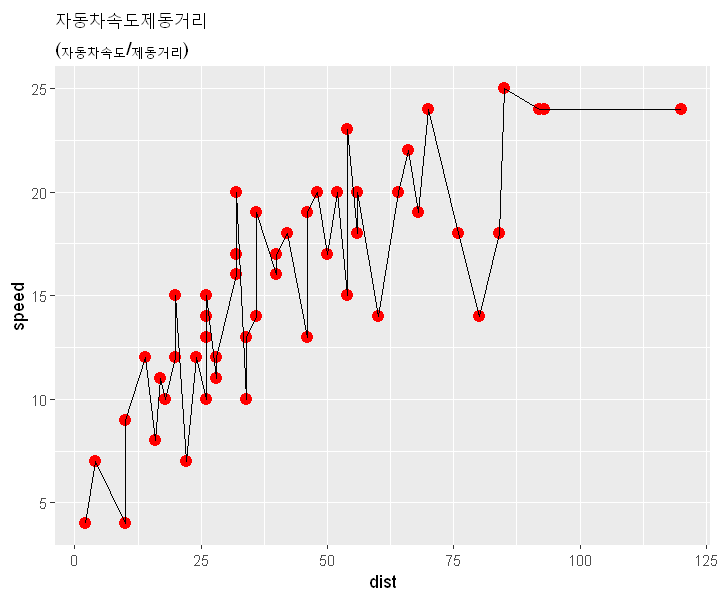

In [86]:
ggplot(cars, aes(x = dist, y = speed)) +
   geom_point(size = 3, color = "red") +
  geom_line() +
 ggtitle('자동차속도제동거리', subtitle="(자동차속도/제동거리)")

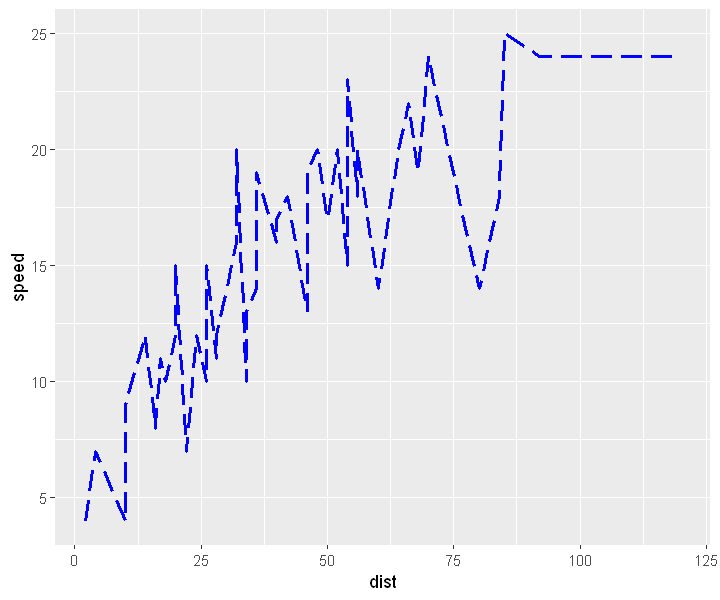

In [95]:
ggplot(cars, aes(x = dist, y = speed)) +
  geom_line(color = 'blue', size =1, linetype = 5) 

`geom_smooth()` using formula 'y ~ x'


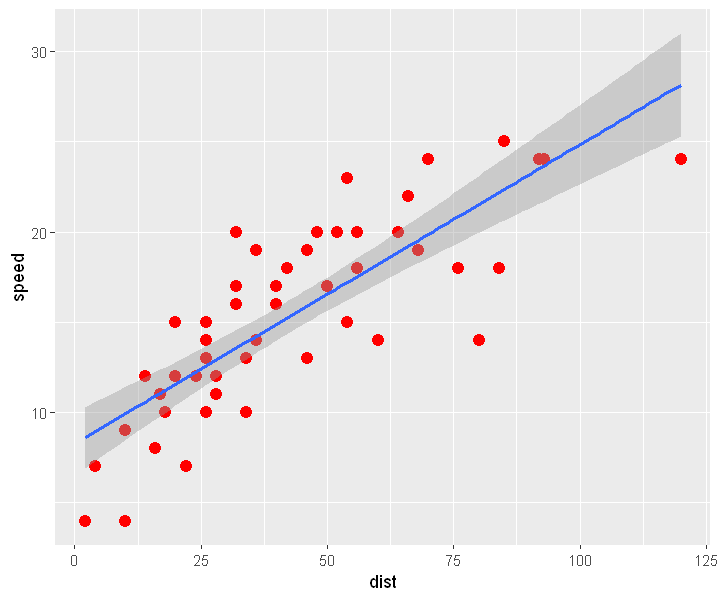

In [87]:
ggplot(cars, aes(x = dist, y = speed)) +
   geom_point(size = 3, color = "red") +
   geom_smooth(method = lm) # 선형회귀(추세선)

`geom_smooth()` using formula 'y ~ x'


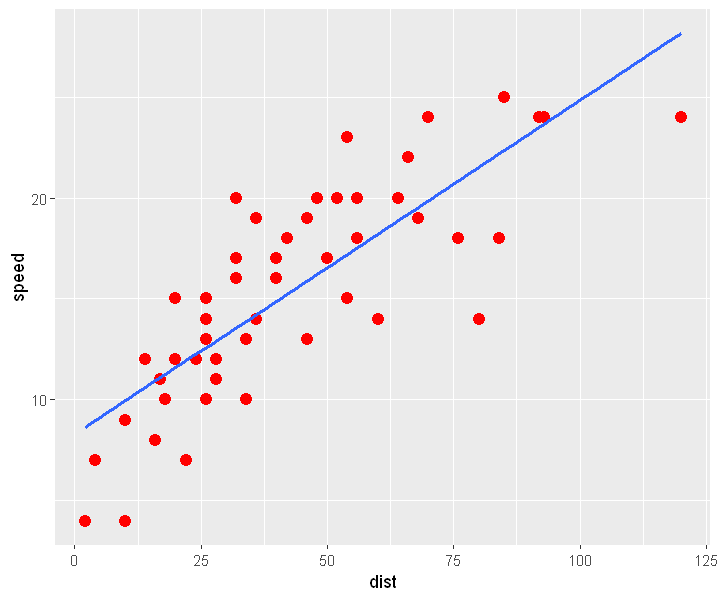

In [89]:
ggplot(cars, aes(x = dist, y = speed)) +
   geom_point(size = 3, color = "red") +
   geom_smooth(method = lm, se = F) # se = F 추세폭 없애기

### geom bar

In [128]:
specie=c( rep("sorgho" , 2) ,
         rep("poacee" , 3) , 
         rep("banana" , 4) , 
         rep("triticum" , 3)  )
condition= rep(c("normal" , "stress" , "Nitrogen") , 4)
value= abs(rnorm(12 , 0 , 15))
df=data.frame(specie,condition,value)
df

specie,condition,value
sorgho,normal,4.7264348
sorgho,stress,0.4055743
poacee,Nitrogen,7.8326952
poacee,normal,21.4135888
poacee,stress,27.6717111
banana,Nitrogen,16.0305478
banana,normal,0.6989024
banana,stress,14.5339859
banana,Nitrogen,1.3121296
triticum,normal,14.9342852


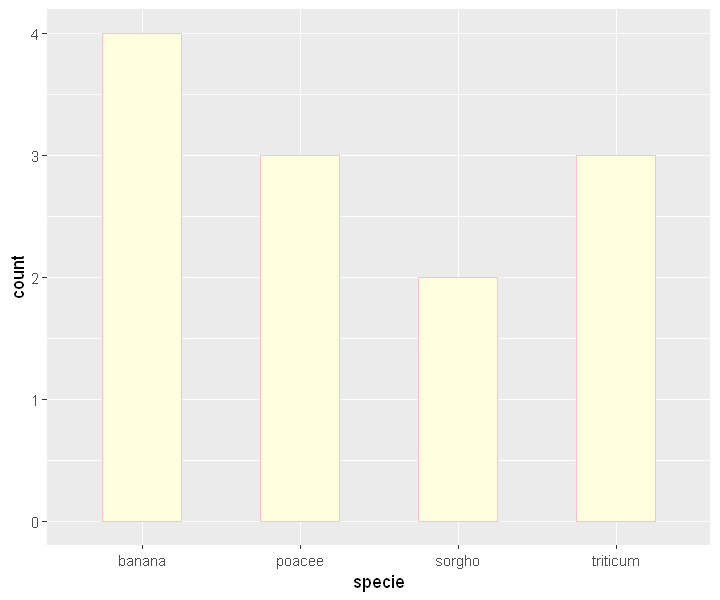

In [102]:
# 컬럼의 개수를 바차트로 나타내기
ggplot(df, aes(x = specie) ) +
geom_bar(width = 0.5, color = 'pink', fill = 'lightyellow') # stat = 'count' 가 디폴트값 

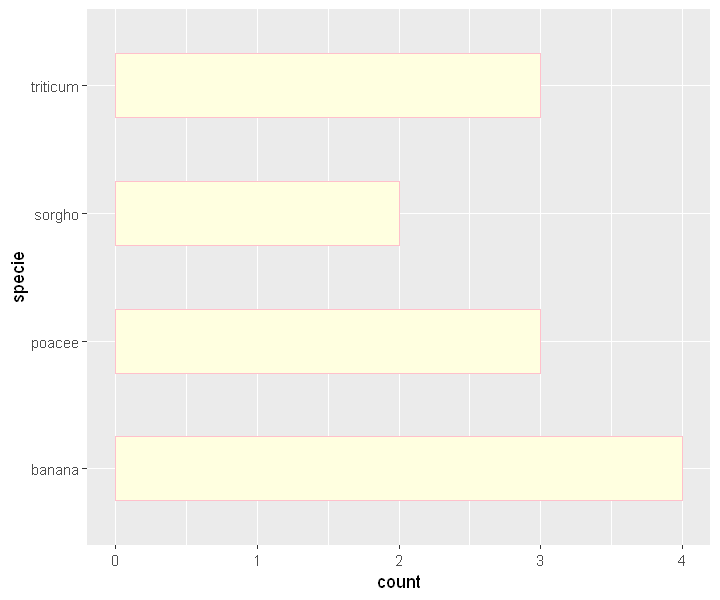

In [103]:
ggplot(df, aes(x = specie) ) +
geom_bar(width = 0.5, color = 'pink', fill = 'lightyellow') +
coord_flip() # 수평으로 보이기

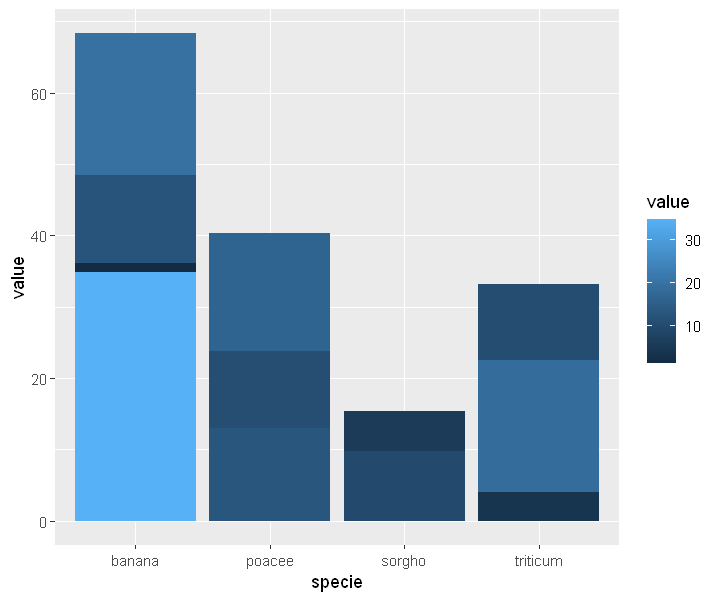

In [113]:
ggplot(df, aes(x = specie, y = value, fill = value) ) +
geom_bar( stat='identity')

In [34]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [129]:
arrange(aggregate(value~specie+condition,df, sum),specie)

specie,condition,value
banana,Nitrogen,17.3426774
banana,normal,0.6989024
banana,stress,14.5339859
poacee,Nitrogen,7.8326952
poacee,normal,21.4135888
poacee,stress,27.6717111
sorgho,normal,4.7264348
sorgho,stress,0.4055743
triticum,Nitrogen,5.0353420
triticum,normal,14.9342852


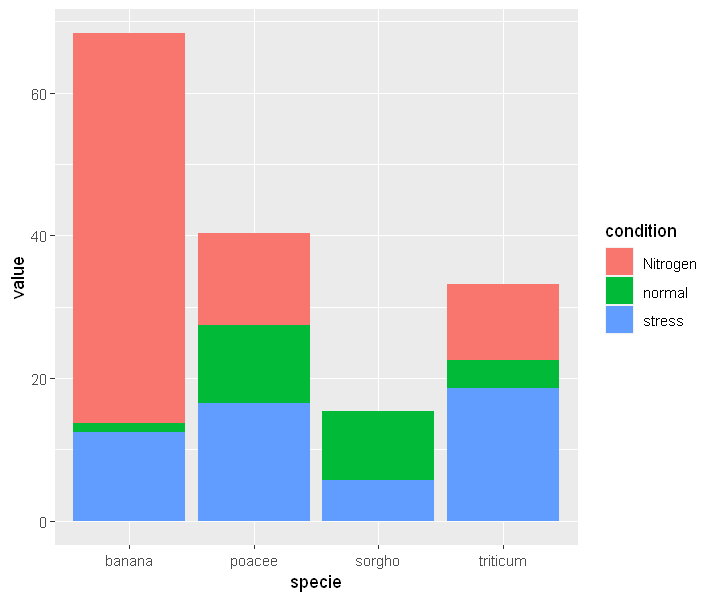

In [116]:
ggplot(df, aes(x = specie, y = value, fill = condition) ) +
geom_bar( stat='identity')

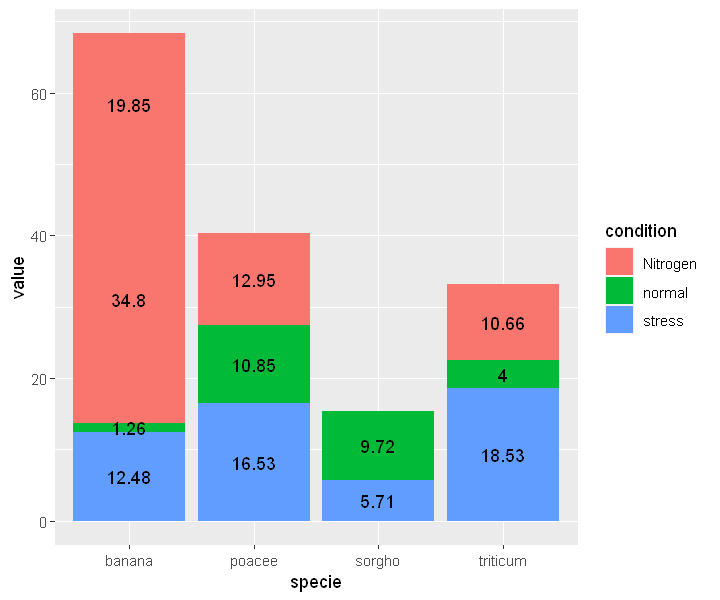

In [123]:
ggplot(df, aes( y=value, x=specie, fill=condition) ) +
geom_bar( stat="identity")+
geom_text( aes(label=round(value,2) ), position = position_stack(vjust = 0.5) )

In [131]:
tt = arrange(aggregate(value~specie+condition,df, sum),specie)
tt

specie,condition,value
banana,Nitrogen,17.3426774
banana,normal,0.6989024
banana,stress,14.5339859
poacee,Nitrogen,7.8326952
poacee,normal,21.4135888
poacee,stress,27.6717111
sorgho,normal,4.7264348
sorgho,stress,0.4055743
triticum,Nitrogen,5.0353420
triticum,normal,14.9342852


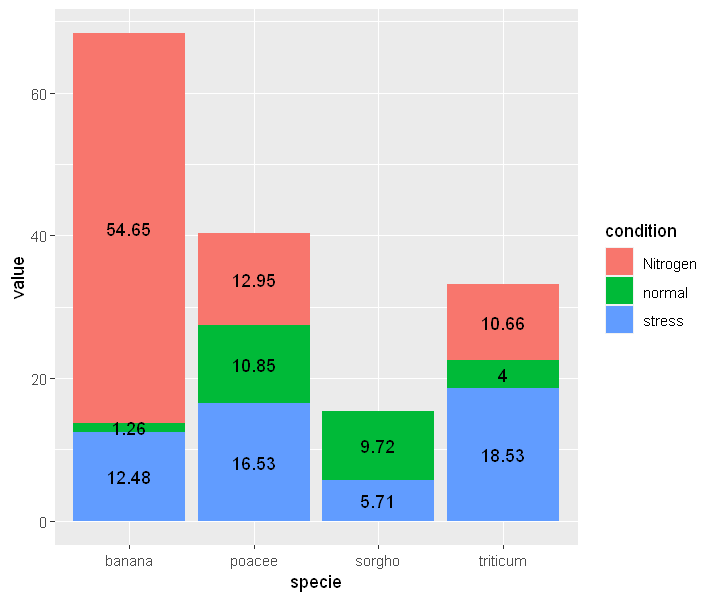

In [125]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar( stat="identity")+
geom_text( aes(label=round(value,2) ), position = position_stack(vjust = 0.5) )

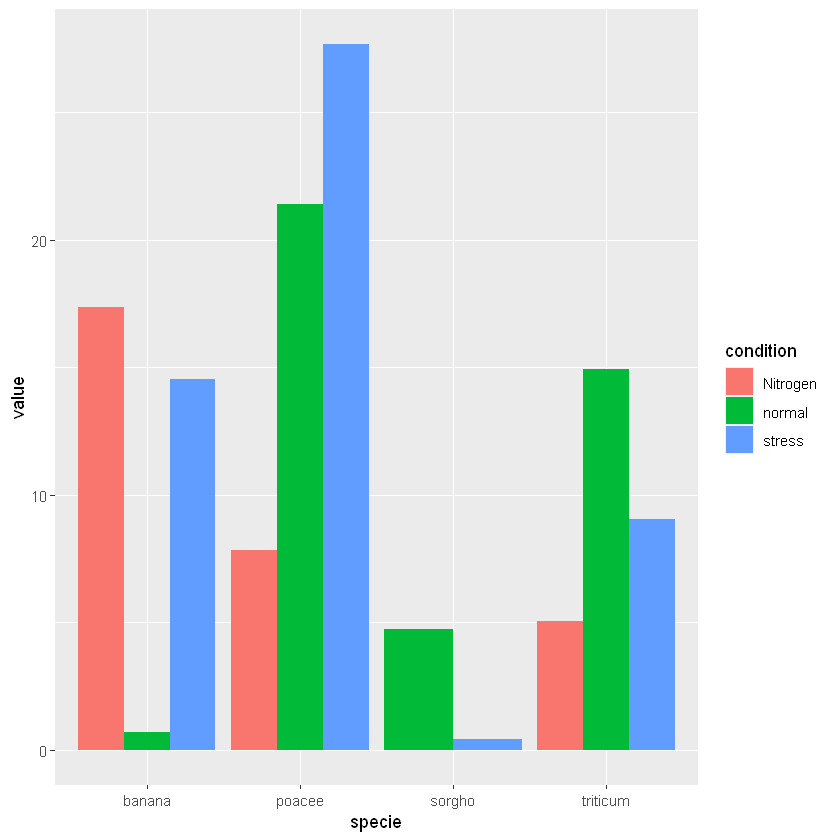

In [133]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar(position='dodge', stat="identity")


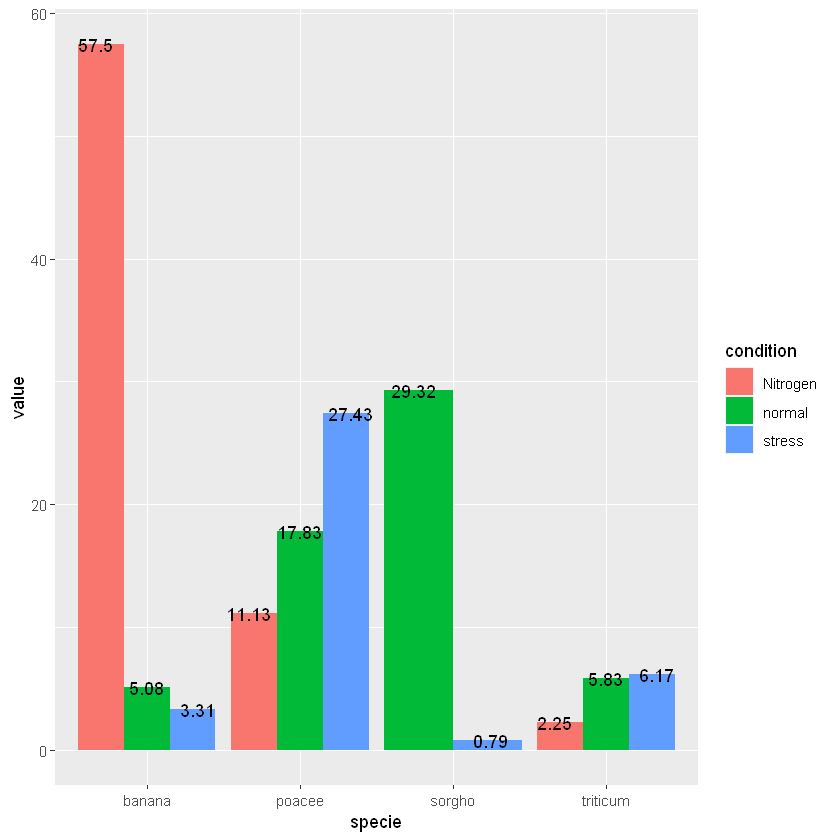

In [26]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar(position='dodge', stat="identity")+
geom_text( aes( label=round(value,2) ),
position = position_dodge( width=1), vjust =0.5 )


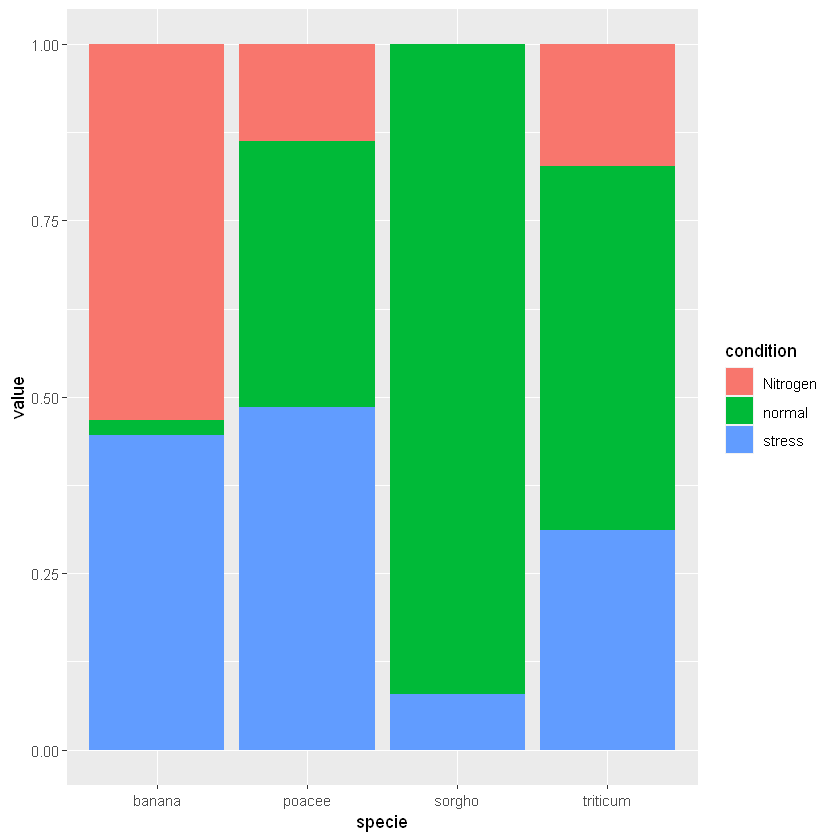

In [134]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar(position='fill', stat="identity") #% 비율로 표시

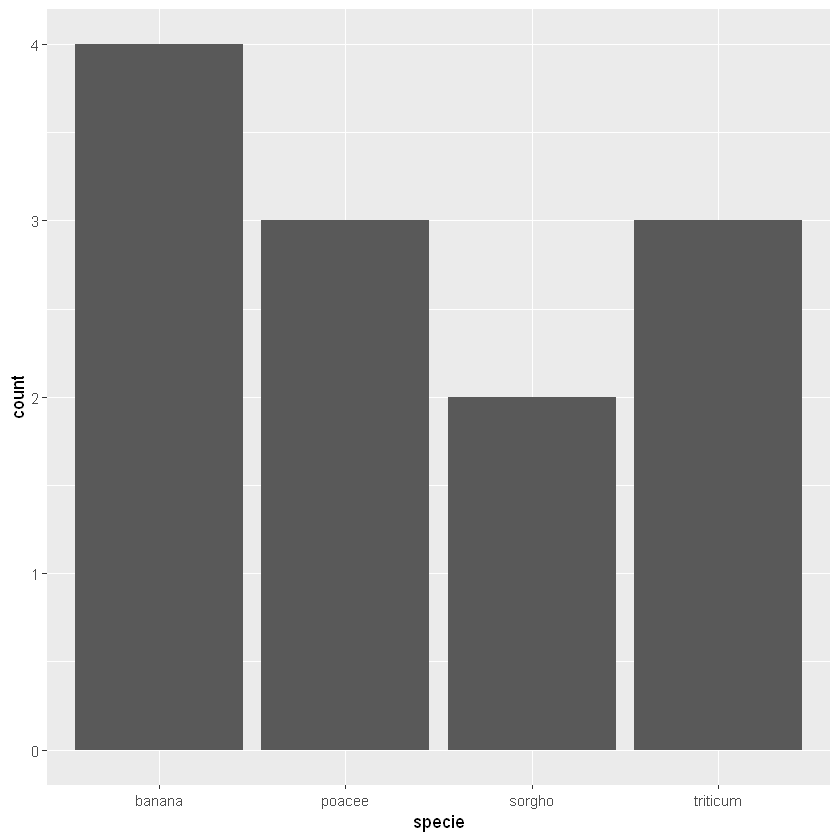

In [29]:
ggplot(df, aes(x = specie))+ geom_bar(stat="count")

In [ ]:
## stat : countm identity, bin

In [31]:
t = c(10,20,30,40,50,60,70)
#1계급(9.94,30] :9.94< c<=30
# (30,50]: 30< c<= 50
#(50,70.1]: 50< c<= 70.1
tc = cut(t, 3)
tc
table(tc)

[1] (9.94,30] (9.94,30] (9.94,30] (30,50]   (30,50]   (50,70.1] (50,70.1]
Levels: (9.94,30] (30,50] (50,70.1]

tc
(9.94,30]   (30,50] (50,70.1] 
        3         2         2 

In [135]:
df$value

[1]  4.7264348  0.4055743  7.8326952 21.4135888 27.6717111 16.0305478
 [7]  0.6989024 14.5339859  1.3121296 14.9342852  9.0471715  5.0353420

In [136]:
tc = cut(df$value, 3)
tc
table(tc)

[1] (0.378,9.49] (0.378,9.49] (0.378,9.49] (18.6,27.7]  (18.6,27.7] 
 [6] (9.49,18.6]  (0.378,9.49] (9.49,18.6]  (0.378,9.49] (9.49,18.6] 
[11] (0.378,9.49] (0.378,9.49]
Levels: (0.378,9.49] (9.49,18.6] (18.6,27.7]

tc
(0.378,9.49]  (9.49,18.6]  (18.6,27.7] 
           7            3            2 

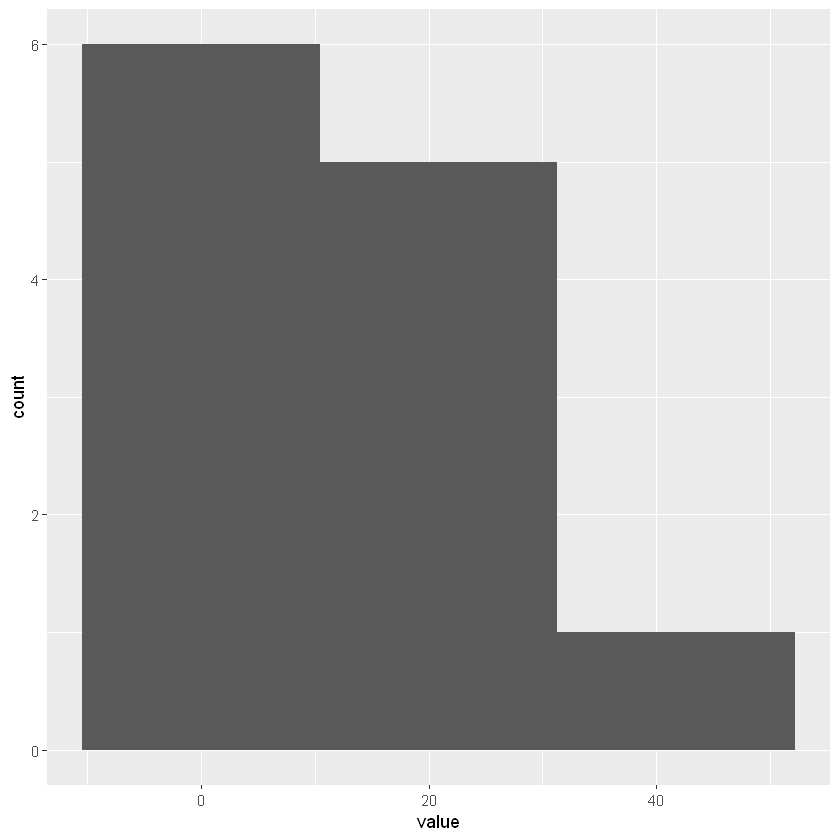

In [32]:
# histogram
ggplot(df,aes(x = value)) + geom_bar(stat = "bin", bins = 3)

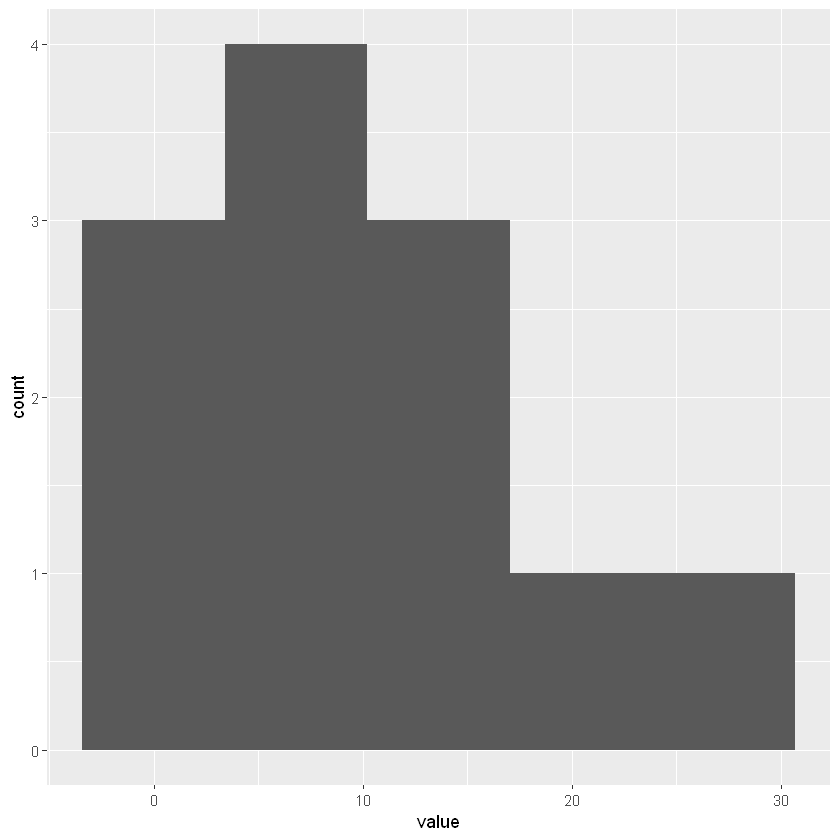

In [137]:
ggplot(df, aes(x = value))+ geom_bar(stat="bin", bins=5)

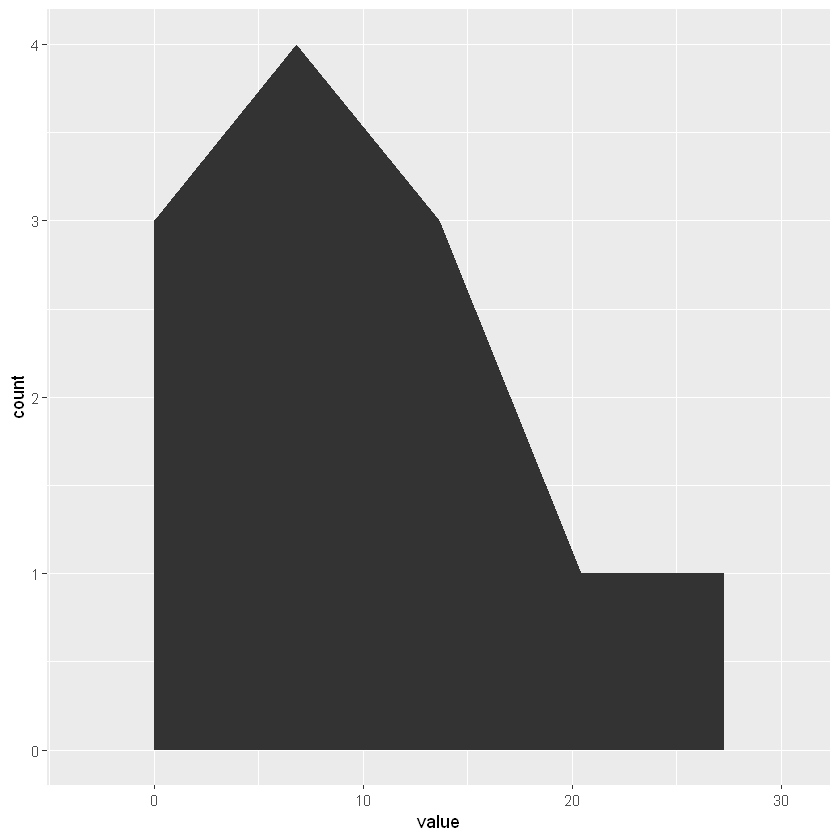

In [138]:
ggplot(df, aes(x = value))+ geom_area(stat = "bin", bins=5)

In [8]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61,338,4.00,4.05,2.39


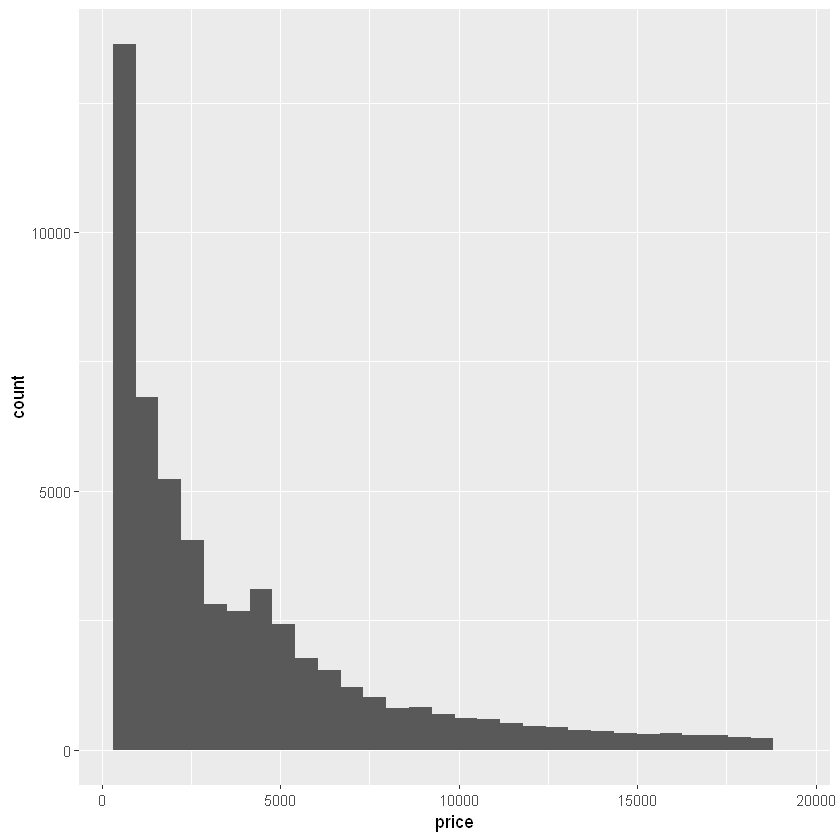

In [140]:
ggplot(diamonds, aes(x = price)) + geom_bar(stat="bin", bins=30)

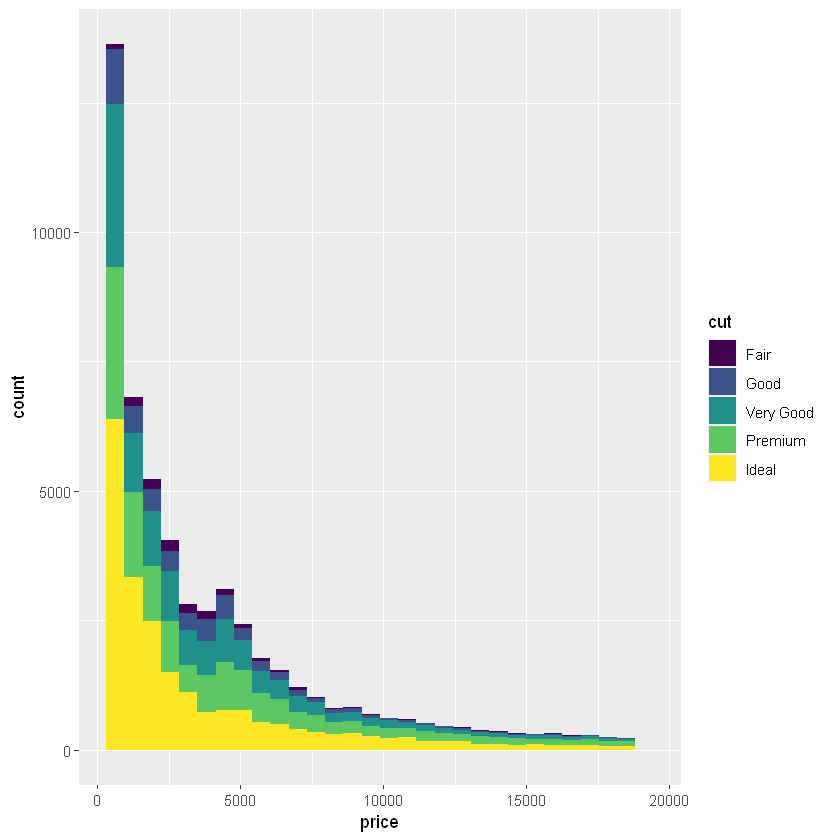

In [9]:
ggplot(diamonds, aes(x = price, fill = cut)) + geom_bar(stat="bin", bins=30)

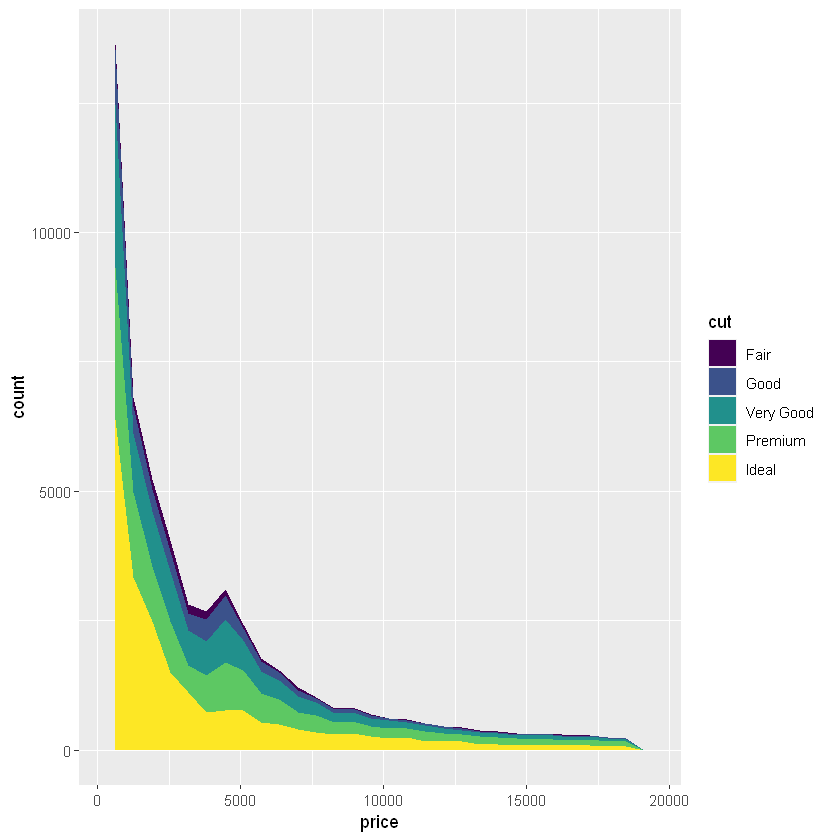

In [10]:
ggplot(diamonds, aes(x = price, fill = cut)) + geom_area(stat="bin", bins=30)

In [11]:
df <- data.frame(
  group = c("Male", "Female", "Child"),
  value = c(25, 25, 80)
  )
head(df)

group,value
Male,25
Female,25
Child,80


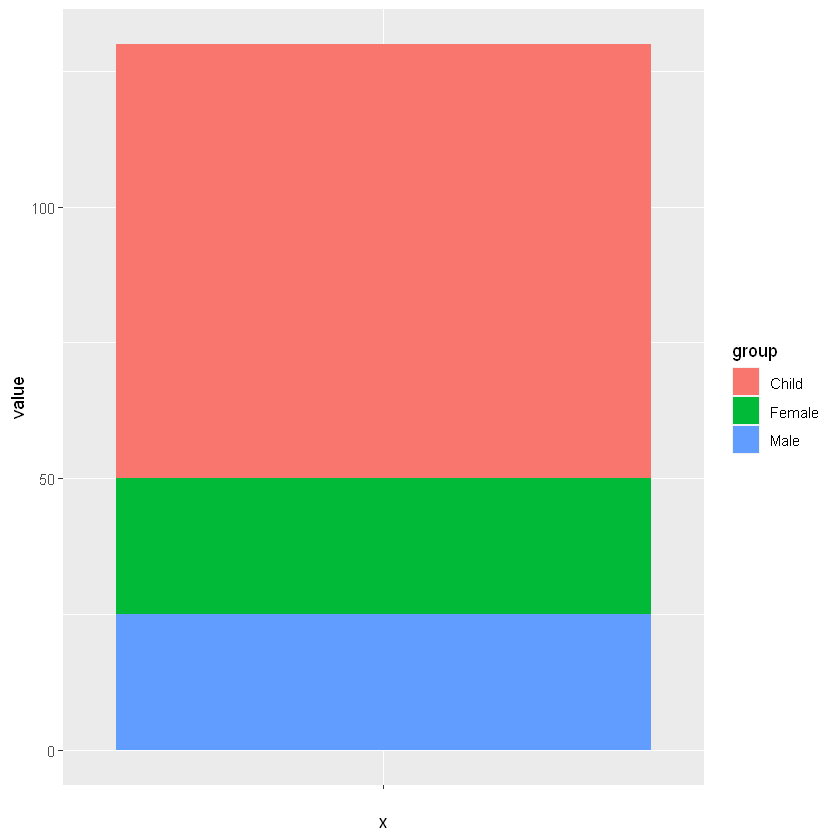

In [12]:
ggplot(df, aes(x="", y=value, fill=group))+
  geom_bar(width = 1, stat = "identity")

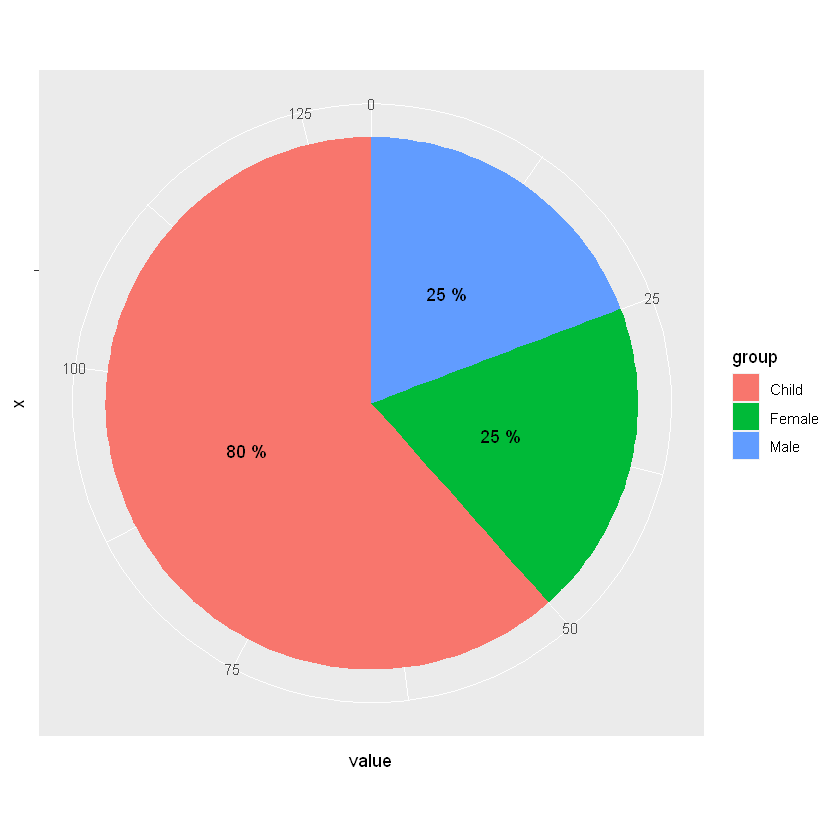

In [14]:
ggplot(df, aes(x="", y=value, fill=group))+
  geom_bar(width = 1, stat = "identity")+
 coord_polar("y", start=0) + 
geom_text( aes(  label= paste(round(value,1), '%') ),
             position=position_stack(vjust=0.5))

### geom_col

In [143]:
name=c('홍길동','이순신','임걱정','정난정','김철수')
kor=c(50,80,60,30,20)
eng=c(70,30,60,20,50)
math=c(90,70,60,40,78)
myclass = c('1학년','1학년','1학년','2학년','2학년')
grade=data.frame(name,kor,eng, math, myclass)
grade

name,kor,eng,math,myclass
홍길동,50,70,90,1학년
이순신,80,30,70,1학년
임걱정,60,60,60,1학년
정난정,30,20,40,2학년
김철수,20,50,78,2학년


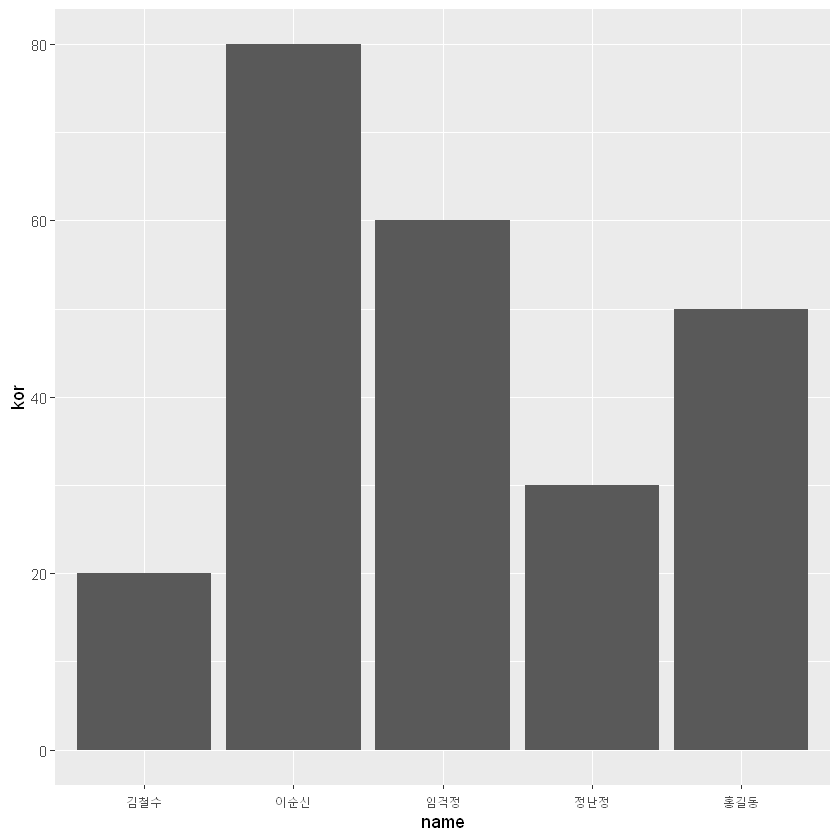

In [16]:
ggplot(grade, aes(x = name, y = kor)) +
geom_bar(stat='identity')

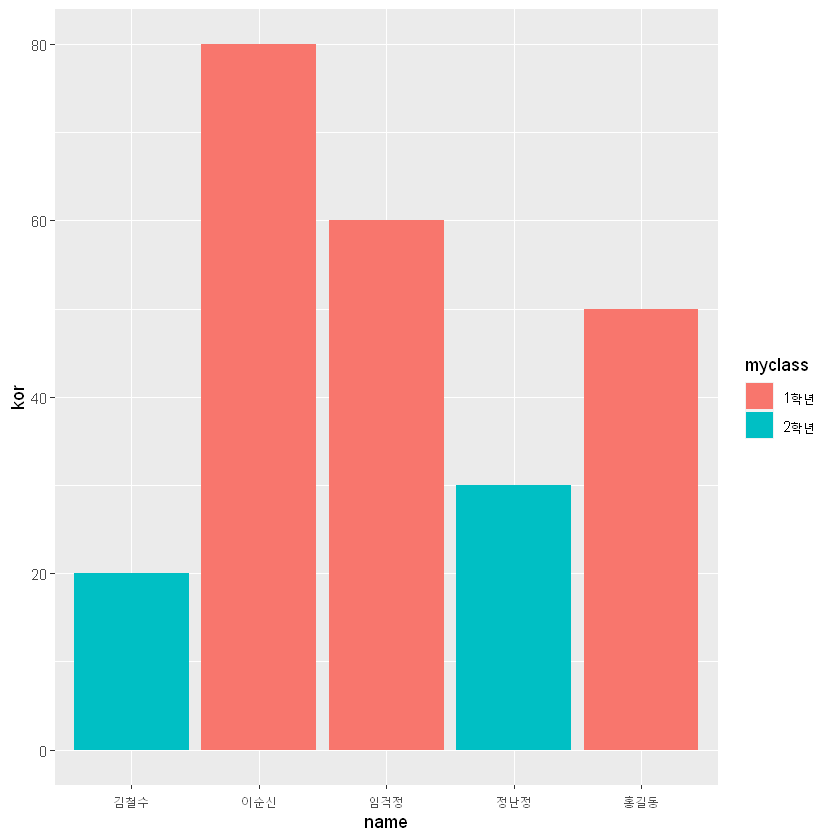

In [144]:
ggplot(grade, aes(x = name, y=kor,fill=myclass))+
geom_col()
# geom_bar(stat="identity")

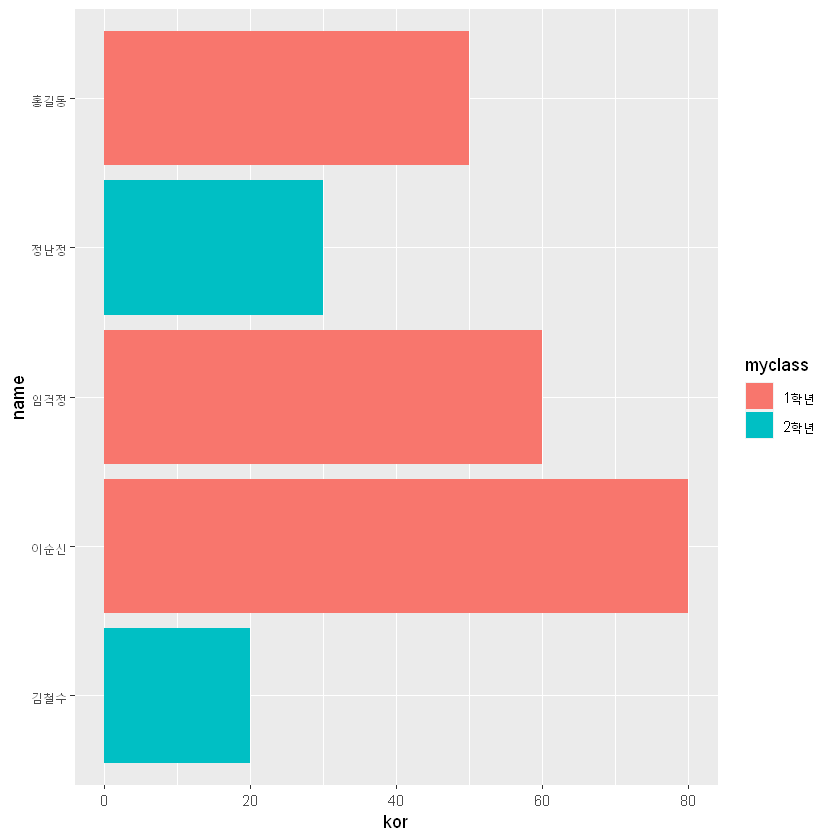

In [145]:
ggplot(grade, aes(x = name, y=kor,fill=myclass))+
geom_col() +coord_flip()
# geom_bar(stat="identity")

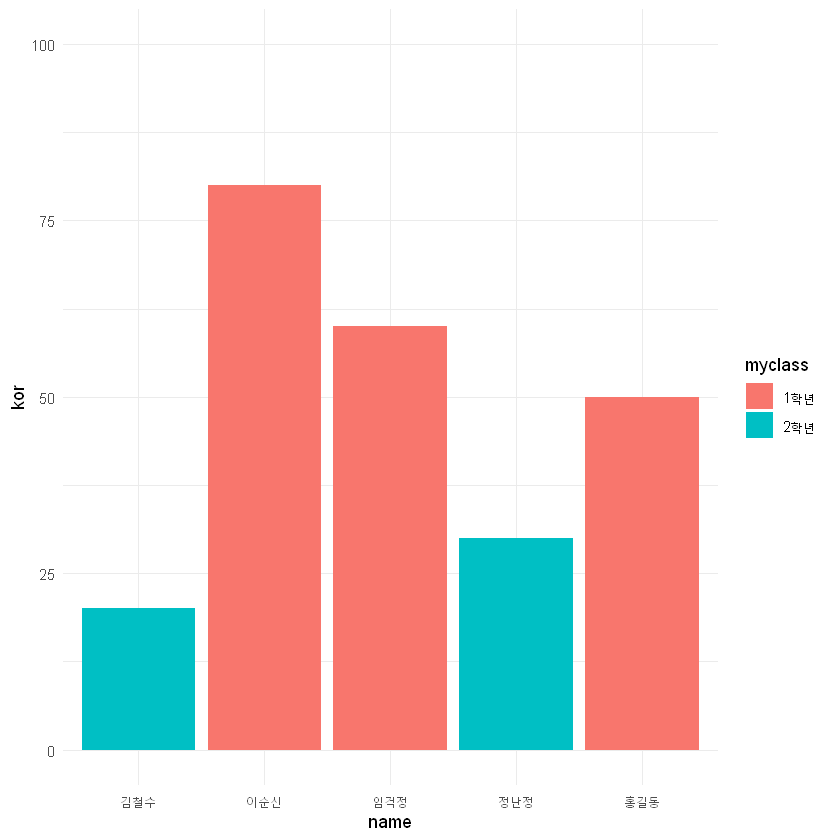

In [146]:
ggplot(grade, aes(x = name, y=kor,fill=myclass))+
geom_col() + ylim(0,100) + theme_minimal()

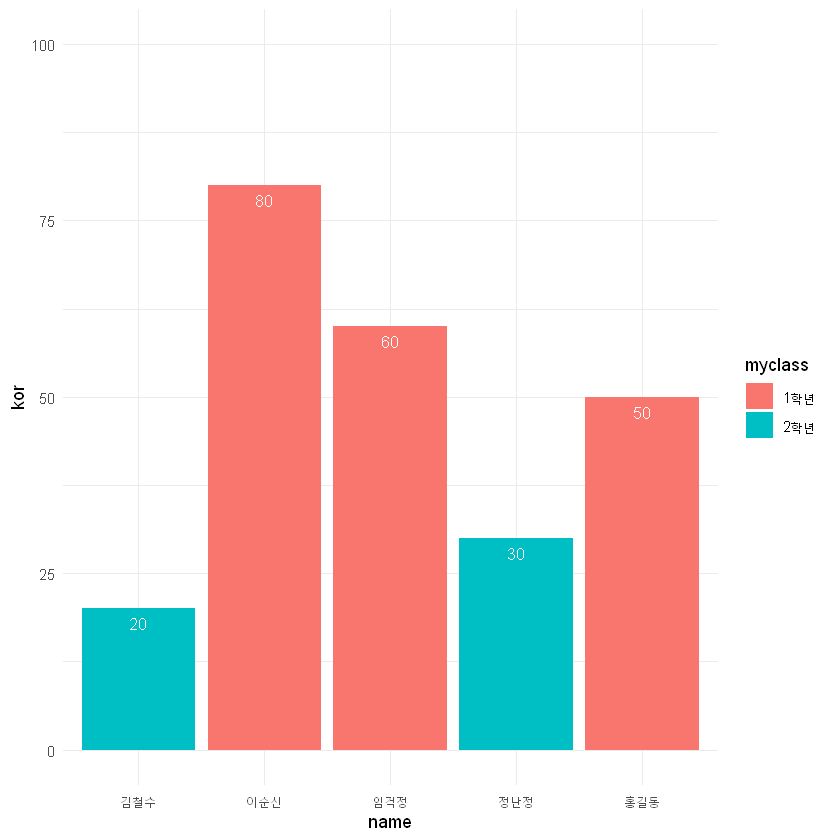

In [147]:
ggplot(grade, aes(x = name, y=kor,fill=myclass))+
geom_col() + ylim(0,100) + 
geom_text( aes(label=kor), vjust=1.6,
          color="white", size=3.5)+
theme_minimal()

In [148]:
install.packages('tidyr')

also installing the dependencies 'glue', 'rlang', 'tibble', 'dplyr', 'tidyselect'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
glue        1.4.2  1.6.2              TRUE
rlang      0.4.11  1.0.2              TRUE
tibble      3.1.1  3.1.6              TRUE
dplyr       1.0.6  1.0.8              TRUE
tidyselect  1.1.1  1.1.2              TRUE
tidyr       1.1.3  1.2.0              TRUE

  Binaries will be installed


Warning message:
"package 'dplyr' is in use and will not be installed"

package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\MEDICI\Anaconda3\Lib\R\library\00LOCK\glue\libs\x64\glue.dll를 C:\Users\MEDICI\Anaconda3\Lib\R\library\glue\libs\x64\glue.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'glue'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\MEDICI\Anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll를 C:\Users\MEDICI\Anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'rlang'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\MEDICI\Anaconda3\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll를 C:\Users\MEDICI\Anaconda3\Lib\R\library\tibble\libs\x64\tibble.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'tibble'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\MEDICI\Anaconda3\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll를 C:\Users\MEDICI\Anaconda3\Lib\R\library\tidyselect\libs\x64\tidyselect.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'tidyselect'"

package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MEDICI\AppData\Local\Temp\Rtmpi2h6lE\downloaded_packages


In [149]:
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'dplyr' 0.8.0.1 is already loaded, but >= 0.8.2 is required


In [150]:
grade2 = gather(grade[c(-5)], Sub,Value, -name )
grade2

ERROR: Error in gather(grade[c(-5)], Sub, Value, -name): 함수 "gather"를 찾을 수 없습니다


## boxplot

In [151]:
ggplot(grade2, aes(x=Sub, y=Value)) + 
  geom_boxplot()

ERROR: Error in ggplot(grade2, aes(x = Sub, y = Value)): 객체 'grade2'를 찾을 수 없습니다


In [ ]:
ggplot(grade2, aes(x=Sub, y=Value, fill=Sub)) + 
  geom_boxplot()+
geom_jitter(shape=16, position=position_jitter(0.3))

In [46]:
economics

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018
1968-01-01,530.9,199808,11.7,5.1,2878
1968-02-01,533.6,199920,12.3,4.5,3001
1968-03-01,544.3,200056,11.7,4.1,2877
1968-04-01,544.0,200208,12.3,4.6,2709


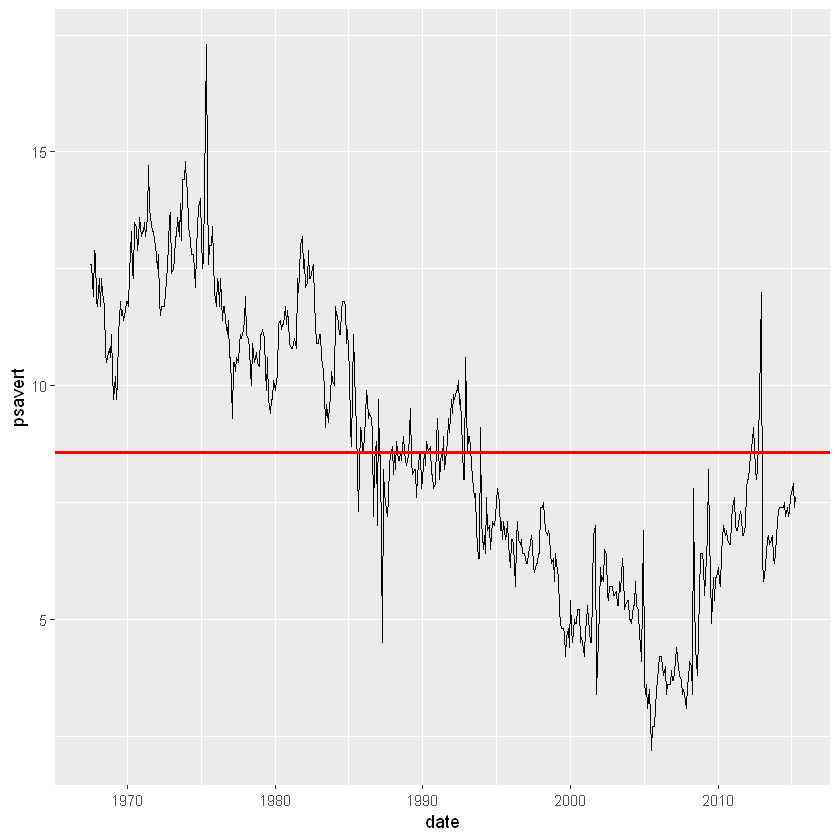

In [48]:
ggplot(economics, aes(x = date, y = psavert)) +
  geom_line() +
  geom_hline(yintercept = mean(economics$psavert) ,colour='red' ,size=1 ) # 수평라인

In [49]:
x_inter <- filter(economics, psavert ==
                    min(economics$psavert))$date
x_inter

[1] "2005-07-01"

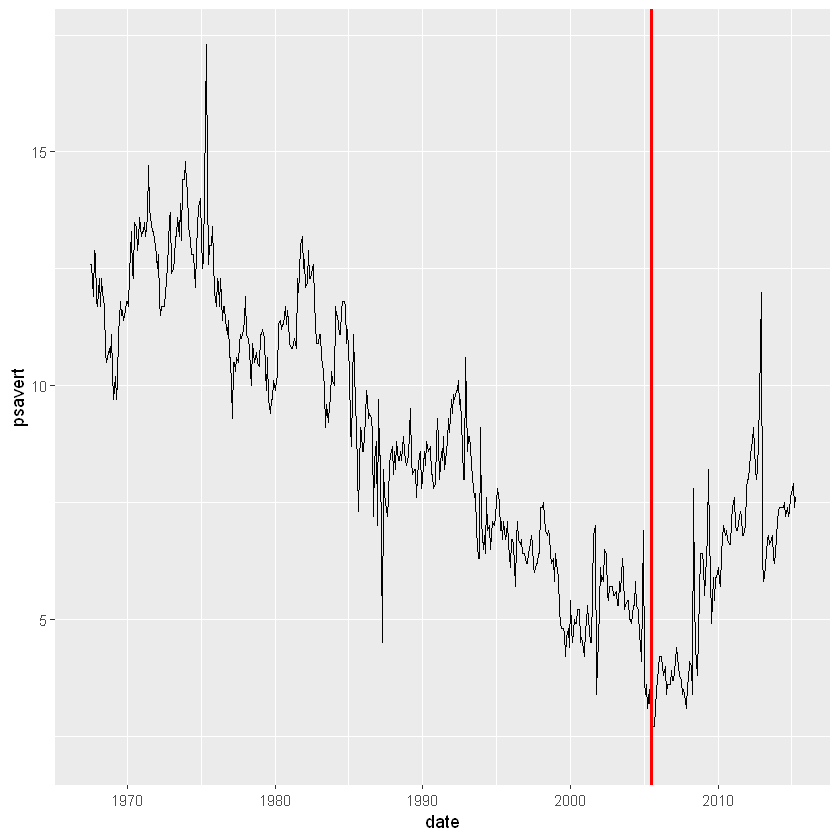

In [50]:
ggplot(economics, aes(x = date, y = psavert)) +
  geom_line() +
  geom_vline(xintercept = x_inter,colour='red' ,size=1 )

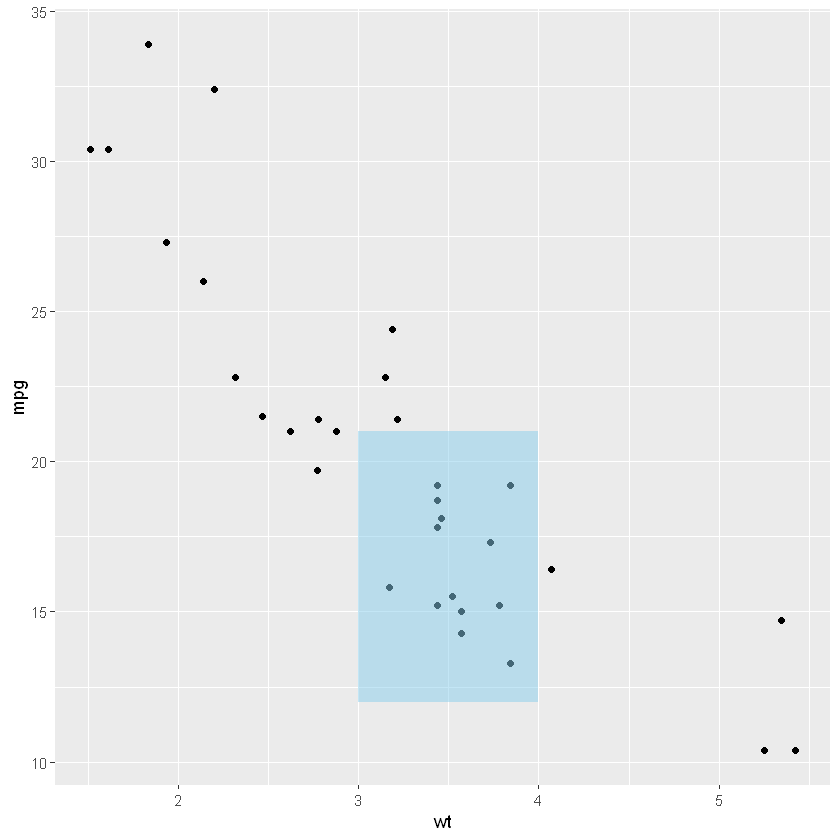

In [51]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  annotate("rect", xmin = 3, xmax = 4, ymin = 12, ymax = 21,
           alpha = 0.5, fill = "skyblue")

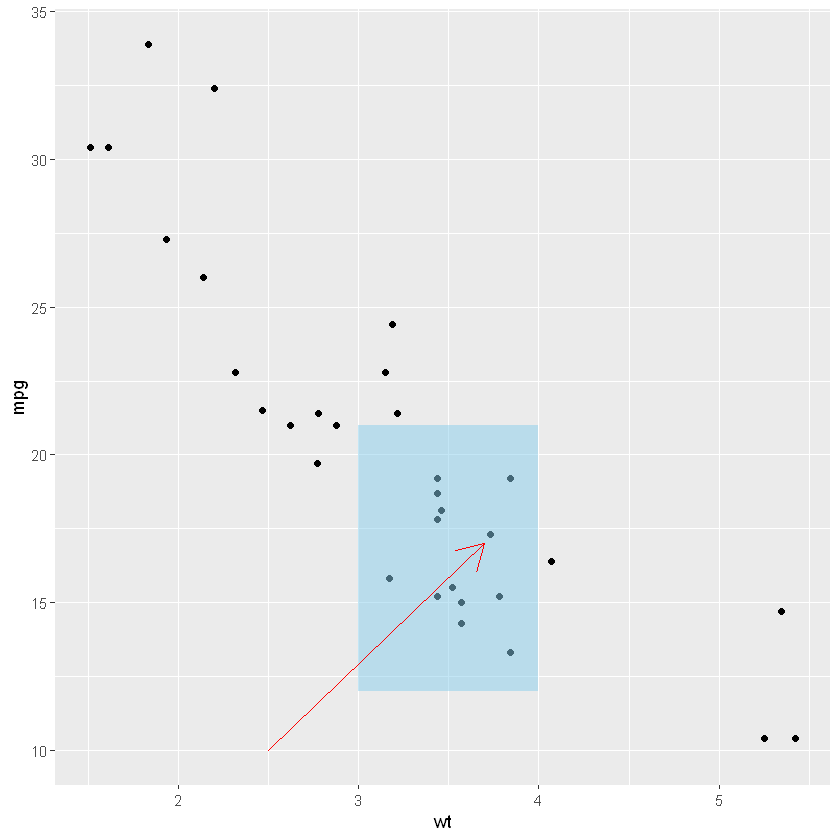

In [52]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  annotate("rect", xmin = 3, xmax = 4, ymin = 12, ymax = 21,
           alpha = 0.5, fill = "skyblue") +
  annotate("segment", x = 2.5, xend = 3.7, y = 10, yend = 17,
           color = "red", arrow = arrow())

* r studio : ggplot2 ewquisse install 후 사용 -> tableau처럼 사용 가능

# 시계열

In [54]:
install.packages('lubridate')


  There is a binary version available but the source version is later:
          binary source needs_compilation
lubridate 1.7.10  1.8.0              TRUE

  Binaries will be installed
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MEDICI\AppData\Local\Temp\Rtmpi2h6lE\downloaded_packages


In [56]:
library('lubridate')

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:dplyr':

    intersect, setdiff, union

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



In [57]:
dt = as.Date('2020-11-12 10:10:10')

In [58]:
Sys.Date() # 현재 날짜

[1] "2022-04-18"

## 날짜 타입 문자열 변환

In [60]:
format(Sys.Date(), "%m-%d-%Y")
# %a - 한 글자 요일
# %A - 세 글자 요일
# %H - 시
# %M - 분
# %S - 초

[1] "04-18-2022"

In [61]:
format(dt, "%Y") #년만 가지고 오기

[1] "2020"

In [63]:
format(Sys.Date(), "%Y년%m월%d일")
format(Sys.time(),"%H시%M분%S초")

[1] "2022년04월18일"

[1] "15시29분30초"

In [64]:
year(dt)

[1] 2020

In [65]:
install.packages('quantmod') # 금융데이터

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MEDICI\AppData\Local\Temp\Rtmpi2h6lE\downloaded_packages


In [66]:
library('quantmod')

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [69]:
sam = getSymbols( Symbols = '005930.KS',src='yahoo',from='2017-01-01',
                      to='2022-04-15', auto.assign = F)
sam

           005930.KS.Open 005930.KS.High 005930.KS.Low 005930.KS.Close
2017-01-02          35980          36240         35880           36100
2017-01-03          36280          36620         36020           36480
2017-01-04          36500          36520         36100           36160
2017-01-05          36060          36060         35540           35560
2017-01-06          36180          36440         36040           36200
2017-01-09          36600          37500         36560           37220
2017-01-10          37280          37400         37080           37240
2017-01-11          37520          38560         37420           38280
2017-01-12          38000          38800         37980           38800
2017-01-13          38100          38320         37460           37460
2017-01-16          36860          37820         36320           36660
2017-01-17          36580          37460         36580           36960
2017-01-18          37040          37500         36620           36940
2017-0

In [70]:
class(sam)

[1] "xts" "zoo"

In [80]:
samsung = data.frame(sam)
samsung

,X005930.KS.Open,X005930.KS.High,X005930.KS.Low,X005930.KS.Close,X005930.KS.Volume,X005930.KS.Adjusted
2017-01-02,35980,36240,35880,36100,4650600,31327.47
2017-01-03,36280,36620,36020,36480,7357650,31657.24
2017-01-04,36500,36520,36100,36160,7971750,31379.54
2017-01-05,36060,36060,35540,35560,10967450,30858.86
2017-01-06,36180,36440,36040,36200,8880950,31414.25
2017-01-09,36600,37500,36560,37220,13194900,32299.41
2017-01-10,37280,37400,37080,37240,9099800,32316.76
2017-01-11,37520,38560,37420,38280,12018150,33219.27
2017-01-12,38000,38800,37980,38800,11669150,33670.52
2017-01-13,38100,38320,37460,37460,15954450,32507.68


In [72]:
str(samsung)

'data.frame':	1296 obs. of  6 variables:
 $ X005930.KS.Open    : num  35980 36280 36500 36060 36180 ...
 $ X005930.KS.High    : num  36240 36620 36520 36060 36440 ...
 $ X005930.KS.Low     : num  35880 36020 36100 35540 36040 ...
 $ X005930.KS.Close   : num  36100 36480 36160 35560 36200 ...
 $ X005930.KS.Volume  : num  4650600 7357650 7971750 10967450 8880950 ...
 $ X005930.KS.Adjusted: num  31327 31657 31380 30859 31414 ...


In [81]:
samsung['sdate'] =as.Date(row.names(samsung) )
samsung

,X005930.KS.Open,X005930.KS.High,X005930.KS.Low,X005930.KS.Close,X005930.KS.Volume,X005930.KS.Adjusted,sdate
2017-01-02,35980,36240,35880,36100,4650600,31327.47,2017-01-02
2017-01-03,36280,36620,36020,36480,7357650,31657.24,2017-01-03
2017-01-04,36500,36520,36100,36160,7971750,31379.54,2017-01-04
2017-01-05,36060,36060,35540,35560,10967450,30858.86,2017-01-05
2017-01-06,36180,36440,36040,36200,8880950,31414.25,2017-01-06
2017-01-09,36600,37500,36560,37220,13194900,32299.41,2017-01-09
2017-01-10,37280,37400,37080,37240,9099800,32316.76,2017-01-10
2017-01-11,37520,38560,37420,38280,12018150,33219.27,2017-01-11
2017-01-12,38000,38800,37980,38800,11669150,33670.52,2017-01-12
2017-01-13,38100,38320,37460,37460,15954450,32507.68,2017-01-13


In [82]:
samsung = samsung[,c(7,1,2,3,4,5,6)]
samsung

,sdate,X005930.KS.Open,X005930.KS.High,X005930.KS.Low,X005930.KS.Close,X005930.KS.Volume,X005930.KS.Adjusted
2017-01-02,2017-01-02,35980,36240,35880,36100,4650600,31327.47
2017-01-03,2017-01-03,36280,36620,36020,36480,7357650,31657.24
2017-01-04,2017-01-04,36500,36520,36100,36160,7971750,31379.54
2017-01-05,2017-01-05,36060,36060,35540,35560,10967450,30858.86
2017-01-06,2017-01-06,36180,36440,36040,36200,8880950,31414.25
2017-01-09,2017-01-09,36600,37500,36560,37220,13194900,32299.41
2017-01-10,2017-01-10,37280,37400,37080,37240,9099800,32316.76
2017-01-11,2017-01-11,37520,38560,37420,38280,12018150,33219.27
2017-01-12,2017-01-12,38000,38800,37980,38800,11669150,33670.52
2017-01-13,2017-01-13,38100,38320,37460,37460,15954450,32507.68


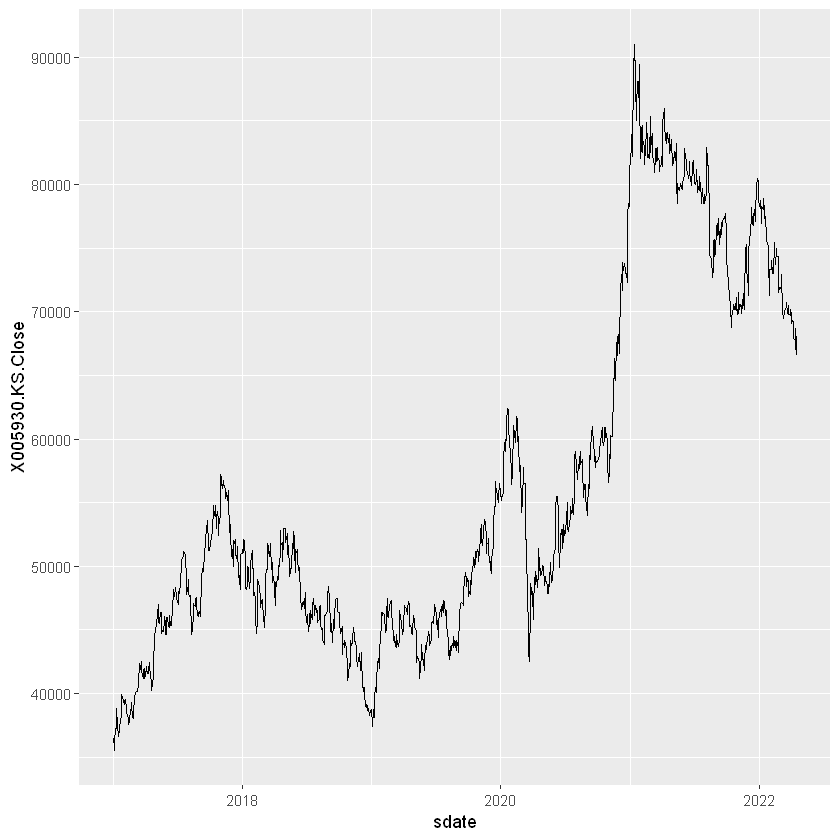

In [86]:
## 종가에 대한 라인차트 (ggplot2)
ggplot(samsung,  aes(x =sdate, y = X005930.KS.Close)) +
geom_line()

In [88]:
year(samsung$sdate)

[1] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
  [15] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
  [29] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
  [43] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
  [57] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
  [71] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
  [85] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
  [99] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [113] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [127] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [141] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [155] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [169] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [183] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [197] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [211] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [225] 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017
 [239] 2017 2017 2017 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [253] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [267] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [281] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [295] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [309] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [323] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [337] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [351] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [365] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [379] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [393] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [407] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [421] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [435] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [449] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [463] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [477] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2019 2019 2019 2019 2019
 [491] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [505] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [519] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [533] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [547] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [561] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [575] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [589] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [603] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [617] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [631] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [645] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [659] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [673] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [687] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [701] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019
 [715] 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019

In [87]:
# 2020년도 데이터를 출력하시오
filter(samsung, year(samsung$sdate) == "2020")

sdate,X005930.KS.Open,X005930.KS.High,X005930.KS.Low,X005930.KS.Close,X005930.KS.Volume,X005930.KS.Adjusted
2020-01-02,55500,56000,55000,55200,12993228,51824.09
2020-01-03,56000,56600,54900,55500,15422255,52105.75
2020-01-06,54900,55600,54600,55500,10278951,52105.75
2020-01-07,55700,56400,55600,55800,10009778,52387.40
2020-01-08,56200,57400,55900,56800,23501171,53326.24
2020-01-09,58400,58600,57400,58600,24102579,55016.16
2020-01-10,58800,59700,58300,59500,16000170,55861.12
2020-01-13,59600,60000,59100,60000,11359139,56330.54
2020-01-14,60400,61000,59900,60000,16906295,56330.54
2020-01-15,59500,59600,58900,59000,14300928,55391.70


In [96]:
# 2020년 1월
subset(samsung, year( samsung$sdate)==2020 & month( samsung$sdate )==1 )

,sdate,X005930.KS.Open,X005930.KS.High,X005930.KS.Low,X005930.KS.Close,X005930.KS.Volume,X005930.KS.Adjusted
2020-01-02,2020-01-02,55500,56000,55000,55200,12993228,51824.09
2020-01-03,2020-01-03,56000,56600,54900,55500,15422255,52105.75
2020-01-06,2020-01-06,54900,55600,54600,55500,10278951,52105.75
2020-01-07,2020-01-07,55700,56400,55600,55800,10009778,52387.40
2020-01-08,2020-01-08,56200,57400,55900,56800,23501171,53326.24
2020-01-09,2020-01-09,58400,58600,57400,58600,24102579,55016.16
2020-01-10,2020-01-10,58800,59700,58300,59500,16000170,55861.12
2020-01-13,2020-01-13,59600,60000,59100,60000,11359139,56330.54
2020-01-14,2020-01-14,60400,61000,59900,60000,16906295,56330.54
2020-01-15,2020-01-15,59500,59600,58900,59000,14300928,55391.70


In [97]:
day(samsung$sdate)

[1]  2  3  4  5  6  9 10 11 12 13 16 17 18 19 20 23 24 25 26 31  1  2  3  6
  [25]  7  8  9 10 13 14 15 16 17 20 21 22 23 24 27 28  2  3  6  7  8  9 10 13
  [49] 14 15 16 17 20 21 22 23 24 27 28 29 30 31  3  4  5  6  7 10 11 12 13 14
  [73] 17 18 19 20 21 24 25 26 27 28  2  4  8 10 11 12 15 16 17 18 19 22 23 24
  [97] 25 26 29 30 31  1  2  5  7  8  9 12 13 14 15 16 19 20 21 22 23 26 27 28
 [121] 29 30  3  4  5  6  7 10 11 12 13 14 17 18 19 20 21 24 25 26 27 28 31  1
 [145]  2  3  4  7  8  9 10 11 14 16 17 18 21 22 23 24 25 28 29 30 31  1  4  5
 [169]  6  7  8 11 12 13 14 15 18 19 20 21 25 26 27 28 29 10 11 12 13 16 17 18
 [193] 19 20 23 24 25 26 27 30 31  1  2  3  6  7  8  9 10 13 14 15 16 17 20 21
 [217] 22 23 24 27 28 29 30  1  4  5  6  7  8 11 12 13 14 15 18 19 21 22 26 27
 [241] 28  2  3  4  5  8  9 10 11 12 15 16 17 18 19 22 23 24 25 26 29 30 31  1
 [265]  2  5  6  7  8  9 12 13 14 19 20 21 22 23 26 27 28  2  5  6  7  8  9 12
 [289] 13 14 15 16 19 20 21 22 23 26 27 28 29 30  2  3  4  5  6  9 10 11 12 13
 [313] 16 17 18 19 20 23 24 25 26 27 30  2  3  4  8  9 10 11 14 15 16 17 18 21
 [337] 23 24 25 28 29 30 31  1  4  5  7  8 11 12 14 15 18 19 20 21 22 25 26 27
 [361] 28 29  2  3  4  5  6  9 10 11 12 13 16 17 18 19 20 23 24 25 26 27 30 31
 [385]  1  2  3  6  7  8  9 10 13 14 16 17 20 21 22 23 24 27 28 29 30 31  3  4
 [409]  5  6  7 10 11 12 13 14 17 18 19 20 21 27 28  1  2  4  5  8 10 11 12 15
 [433] 16 17 18 19 22 23 24 25 26 29 30 31  1  2  5  6  7  8  9 12 13 14 15 16
 [457] 19 20 21 22 23 26 27 28 29 30  3  4  5  6  7 10 11 12 13 14 17 18 19 20
 [481] 21 24 26 27 28  2  3  4  7  8  9 10 11 14 15 16 17 18 21 22 23 24 25 28
 [505] 29 30 31  1  7  8 11 12 13 14 15 18 19 20 21 22 25 26 27 28  4  5  6  7
 [529]  8 11 12 13 14 15 18 19 20 21 22 25 26 27 28 29  1  2  3  4  5  8  9 10
 [553] 11 12 15 16 17 18 19 22 23 24 25 26 29 30  2  3  7  8  9 10 13 14 15 16
 [577] 17 20 21 22 23 24 27 28 29 30 31  3  4  5  7 10 11 12 13 14 17 18 19 20
 [601] 21 24 25 26 27 28  1  2  3  4  5  8  9 10 11 12 15 16 17 18 19 22 23 24
 [625] 25 26 29 30 31  1  2  5  6  7  8  9 12 13 14 16 19 20 21 22 23 26 27 28
 [649] 29 30  2  3  4  5  6  9 10 11 16 17 18 19 20 23 24 25 26 27 30  1  2  4
 [673]  7  8 10 11 14 15 16 17 18 21 22 23 24 25 28 29 30 31  1  4  5  6  7  8
 [697] 11 12 13 14 15 18 19 20 21 22 25 26 27 28 29  2  3  4  5  6  9 10 11 12
 [721] 13 16 17 18 19 20 23 24 26 27 30  2  3  6  7  8  9 10 13 14 15 16 17 20
 [745] 21 22 23 28 29 30 31  3  4  5  6  7 10 11 12 13 14 17 18 19 20 21 24 25
 [769] 26 27 28  2  3  4  5  6  9 10 11 12 13 16 17 18 19 20 23 24 25 26 27 30
 [793] 31  1  2  3  6  7  8  9 10 13 14 16 17 20 21 22 23 24 27 28 29  4  6  7
 [817]  8 11 12 13 14 15 18 19 20 21 22 25 26 27 28 29  1  2  3  4  5  8  9 10
 [841] 11 12 15 16 17 18 19 22 23 24 25 26 29 30  1  2  3  6  7  8  9 10 13 14
 [865] 15 16 17 20 21 22 23 24 27 28 29 30 31  3  4  5  6  7 10 11 12 13 14 18
 [889] 19 20 21 24 25 26 27 28 31  1  2  3  4  7  8  9 10 11 14 15 16 17 18 21
 [913] 22 23 24 25 28 29  5  6  7  8 12 13 14 15 16 19 20 21 22 23 26 27 28 29
 [937] 30  2  3  4  5  6  9 10 11 12 13 16 17 18 19 20 23 24 25 26 27 30  1  2
 [961]  3  4  7  8  9 10 11 14 15 16 17 18 21 22 23 24 28 29 30  4  5  6  7  8
 [985] 11 12 13 14 15 18 19 20 21 22 25 26 27 28 29  1  2  3  4  5  8  9 10 15
[1009] 16 17 18 19 22 23 24 25 26  2  3  4  5  8  9 10 11 12 15 16 17 18 19 22
[1033] 23 24 25 26 29 30 31  1  2  5  6  7  8  9 12 13 14 15 16 19 20 21 22 23
[1057] 26 27 28 29 30  3  4  6  7 10 11 12 13 14 17 18 20 21 24 25 26 27 28 31
[1081]  1  2  3  4  7  8  9 10 11 14 15 16 17 18 21 22 23 24 25 28 29 30  1  2
[1105]  5  6  7  8  9 12 13 14 15 16 19 20 21 22 23 26 27 28 29 30  2  3  4  5
[1129]  6  9 10 11 12 13 17 18 19 20 23 24 25 26 27 30 31  1  2  3  6  7  8  9
[1153] 10 13 14 15 16 17 23 24 27 28 29 30  1  5  6  7  8 12 13 14 15 18 19 20
[1177] 21 22 25 26 27 28 29  1  2  3  4  5  8  9 10 11 12 15 16 17 18 19 22 23
[1201] 24 25 26 29 30  1  2  3  6  7  8  9 10 13 14 1

In [98]:
wday(samsung$sdate) #일요일 ~ 토요일 1~7

[1] 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5
  [38] 6 2 3 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3
  [75] 4 5 6 2 3 4 5 6 3 5 2 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 4 5 6 2 3 4 5
 [112] 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2
 [149] 3 4 5 6 2 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 2 3 4 5 6
 [186] 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4
 [223] 5 6 2 3 4 5 6 2 3 4 5 6 2 3 5 6 3 4 5 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5
 [260] 6 2 3 4 5 6 2 3 4 5 6 2 3 4 2 3 4 5 6 2 3 4 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5
 [297] 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 4 5 6 3 4 5 6 2 3 4
 [334] 5 6 2 4 5 6 2 3 4 5 6 2 3 5 6 2 3 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4
 [371] 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 5 6 2 3 4 5 6 2 3 4 5 6 2
 [408] 3 4 5 6 2 3 4 5 6 2 3 4 5 6 5 6 2 3 5 6 2 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4
 [445] 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6
 [482] 2 4 5 6 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 5 6 2 3 4 5 6 2 3 4
 [519] 5 6 2 3 4 5 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2
 [556] 3 4 5 6 2 3 4 5 6 2 3 5 6 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 6 2
 [593] 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4
 [630] 5 6 2 3 4 5 6 2 3 4 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 2 3 4 5 6 2 3 4
 [667] 5 6 2 3 4 6 2 3 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3
 [704] 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 5 6 2 5 6 2 3 4 5 6 2 3
 [741] 4 5 6 2 3 4 5 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2
 [778] 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 5 6 2 3 4 5 6 2 3 4 2
 [815] 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5
 [852] 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 3
 [889] 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 2 3 4 5 2 3 4
 [926] 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6
 [963] 2 3 4 5 6 2 3 4 5 6 2 3 4 5 2 3 4 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6
[1000] 2 3 4 5 6 2 3 4 2 3 4 5 6 2 3 4 5 6 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6
[1037] 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 5 6 2 3 4 5 6 2 3 5
[1074] 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2
[1111] 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 3 4 5 6 2 3 4 5 6 2 3 4 5
[1148] 6 2 3 4 5 6 2 3 4 5 6 5 6 2 3 4 5 6 3 4 5 6 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2
[1185] 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4
[1222] 5 6 2 3 4 5 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 5 6 2 3 4 5 6 2 3 4 5 6
[1259] 2 3 4 5 6 2 4 5 6 2 3 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5
[1296] 6

In [99]:
wday(samsung$sdate, label = T)  # label = T 실제 요일 표시

[1] 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 화 수 목 금 월
  [25] 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 목 금 월 화 수 목 금 월
  [49] 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금
  [73] 월 화 수 목 금 월 화 수 목 금 화 목 월 수 목 금 월 화 수 목 금 월 화 수
  [97] 목 금 월 화 수 목 금 월 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수
 [121] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화
 [145] 수 목 금 월 화 수 목 금 월 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화
 [169] 수 목 금 월 화 수 목 금 월 화 수 목 월 화 수 목 금 화 수 목 금 월 화 수
 [193] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화
 [217] 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 목 금 화 수
 [241] 목 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목
 [265] 금 월 화 수 목 금 월 화 수 월 화 수 목 금 월 화 수 금 월 화 수 목 금 월
 [289] 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금
 [313] 월 화 수 목 금 월 화 수 목 금 월 수 목 금 화 수 목 금 월 화 수 목 금 월
 [337] 수 목 금 월 화 수 목 금 월 화 목 금 월 화 목 금 월 화 수 목 금 월 화 수
 [361] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화
 [385] 수 목 금 월 화 수 목 금 월 화 목 금 월 화 수 목 금 월 화 수 목 금 월 화
 [409] 수 목 금 월 화 수 목 금 월 화 수 목 금 목 금 월 화 목 금 월 수 목 금 월
 [433] 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금
 [457] 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목
 [481] 금 월 수 목 금 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월
 [505] 화 수 목 금 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 월 화 수 목
 [529] 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수
 [553] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 목 금 화 수 목 금 월 화 수 목
 [577] 금 월 화 수 목 금 월 화 수 목 금 월 화 수 금 월 화 수 목 금 월 화 수 목
 [601] 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수
 [625] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 금 월 화 수 목 금 월 화 수
 [649] 목 금 월 화 수 목 금 월 화 수 월 화 수 목 금 월 화 수 목 금 월 화 수 금
 [673] 월 화 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금
 [697] 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목
 [721] 금 월 화 수 목 금 월 화 목 금 월 목 금 월 화 수 목 금 월 화 수 목 금 월
 [745] 화 수 목 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화
 [769] 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월
 [793] 화 수 목 금 월 화 수 목 금 월 화 목 금 월 화 수 목 금 월 화 수 월 수 목
 [817] 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수
 [841] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화
 [865] 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 화
 [889] 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월
 [913] 화 수 목 금 월 화 월 화 수 목 월 화 수 목 금 월 화 수 목 금 월 화 수 목
 [937] 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수
 [961] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 월 화 수 월 화 수 목 금
 [985] 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 월
[1009] 화 수 목 금 월 화 수 목 금 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월
[1033] 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금
[1057] 월 화 수 목 금 월 화 목 금 월 화 수 목 금 월 화 목 금 월 화 수 목 금 월
[1081] 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금
[1105] 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목
[1129] 금 월 화 수 목 금 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목
[1153] 금 월 화 수 목 금 목 금 월 화 수 목 금 화 수 목 금 화 수 목 금 월 화 수
[1177] 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화
[1201] 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월
[1225] 화 수 목 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 목 금
[1249] 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 수 목 금 월 화 목 금 월
[1273] 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금 월 화 수 목 금
Levels: 일 < 월 < 화 < 수 < 목 < 금 < 토

In [111]:
# 년도별 종가의 평균을 구하시오
aggregate(X005930.KS.Close~year(samsung$sdate),samsung,mean)

year(samsung$sdate),X005930.KS.Close
2017,46377.18
2018,46830.12
2019,46583.33
2020,57167.74
2021,79155.65
2022,72565.22


In [122]:
# 2021년도 월요일 주식 종가의 평균을 구하시오
mean(as.matrix(subset(samsung, year(samsung$sdate)==2021 & wday(samsung$sdate, label = T)=='월','X005930.KS.Close')))

[1] 79580.85

In [120]:
aggregate(X005930.KS.Close~(year(samsung$sdate) & wday(samsung$sdate, label = T)=='월'),samsung,mean)

"year(samsung$sdate) & wday(samsung$sdate, label = T) == ""월""",X005930.KS.Close
FALSE,56296.66
TRUE,55975.08


In [117]:
semester(samsung$sdate) # 상반기 하반기 

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [482] 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [630] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [667] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [704] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [889] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [926] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [963] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1037] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
[1111] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1148] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1185] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1222] 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1259] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1296] 1

In [118]:
quarter(samsung$sdate) # 분기 

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [186] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [223] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 [371] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [408] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [445] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [482] 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 [556] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [630] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [667] 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [704] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [815] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [852] 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [889] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 [926] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [963] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1037] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1074] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
[1111] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1148] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1185] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1222] 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1259] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
[1296] 2

In [121]:
aggregate(X005930.KS.Close~ quarter( samsung$sdate ),samsung,mean)

quarter(samsung$sdate),X005930.KS.Close
1,57375.17
2,54980.25
3,54963.00
4,57487.43
